In [17]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [82]:
df = pd.read_csv("test_2023-08-13_data_cleaned_distances_no_outliers.csv")

In [64]:
df.columns.to_list()

['Unnamed: 0.1',
 'Unnamed: 0',
 'url_id',
 'Celková cena',
 'Podlaží',
 'Užitná plocha',
 'Sklep',
 'Parkování',
 'Výtah',
 'Latitude',
 'Longitude',
 'Terasa',
 'Garáž',
 'Bezbariérový',
 'Plyn',
 'Balkón',
 'Lodžie',
 'Půdní vestavba',
 'Bazén',
 'Energetická_A',
 'Energetická_B',
 'Energetická_C',
 'Energetická_D',
 'Energetická_E',
 'Energetická_F',
 'Energetická_G',
 'Typ bytu_Loft',
 'Typ bytu_Mezonet',
 'Typ bytu_Podkrovní',
 'Umístění objektu_Centrum obce',
 'Umístění objektu_Klidná část obce',
 'Umístění objektu_Okraj obce',
 'Umístění objektu_Polosamota',
 'Umístění objektu_Rušná část obce',
 'Umístění objektu_Samota',
 'Umístění objektu_Sídliště',
 'Vybavení_False',
 'Vybavení_True',
 'Vybavení_Částečně',
 'Vlastnictví_Družstevní',
 'Vlastnictví_Osobní',
 'Vlastnictví_Státní/obecní',
 'Stav objektu_Dobrý',
 'Stav objektu_Novostavba',
 'Stav objektu_Po rekonstrukci',
 'Stav objektu_Projekt',
 'Stav objektu_Před rekonstrukcí',
 'Stav objektu_V rekonstrukci',
 'Stav objektu_Ve

In [84]:
# Drop non-informative columns
data = df.drop(columns=["url_id",'Latitude', 'Longitude'])

# Define features X and target y
X = data.drop(columns=["Celková cena"])
y = data["Celková cena"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((13404, 151), (3351, 151))

In [85]:
# Initialize XGBoost regressor
model = xgb.XGBRegressor(objective ='reg:squarederror', seed=42)

# Fit the model
model.fit(X_train, y_train)


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [86]:
# Predict house prices on the test set
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

948766.6338613735

In [23]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'min_child_weight': [1, 3, 5]
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 27 candidates, totalling 81 fits


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=3; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=3; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=5; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=5; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.01, max_depth=3, min_child_weight=3; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=3, min_child_weight=5; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=6, min_child_weight=3; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=6, min_child_weight=1; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=6, min_child_weight=1; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=6, min_child_weight=1; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=6, min_child_weight=3; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=6, min_child_weight=3; total time=   1.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_cate

[CV] END learning_rate=0.01, max_depth=6, min_child_weight=5; total time=   1.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.01, max_depth=6, min_child_weight=5; total time=   1.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=6, min_child_weight=5; total time=   1.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) 

[CV] END learning_rate=0.01, max_depth=10, min_child_weight=3; total time=   3.8s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=3; total time=   3.7s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=3; total time=   3.7s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=5; total time=   3.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=10, min_child_weight=1; total time=   4.2s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=5; total time=   3.2s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=1; total time=   4.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=10, min_child_weight=1; total time=   4.4s
[CV] END .learning_rate=0.1, max_depth=3, min_child_weight=1; total time=   0.6s
[CV] END .learning_rate=0.1, max_depth=3, min_child_weight=1; total time=   0.6s
[CV] END .learning_rate=0.1, max_depth=3, min_child_weight=1; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.6s
[CV] END .learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.5s
[CV] END .learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.1, max_depth=3, min_child_weight=5; total time=   0.6s
[CV] END .learning_rate=0.1, max_depth=3, min_child_weight=5; total time=   0.5s
[CV] END .learning_rate=0.1, max_depth=3, min_child_weight=5; total time=   0.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.1, max_depth=6, min_child_weight=1; total time=   0.9s
[CV] END .learning_rate=0.1, max_depth=6, min_child_weight=1; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.1, max_depth=6, min_child_weight=1; total time=   1.0s
[CV] END .learning_rate=0.1, max_depth=6, min_child_weight=3; total time=   0.9s
[CV] END .learning_rate=0.1, max_depth=6, min_child_weight=3; total time=   0.8s
[CV] END .learning_rate=0.1, max_depth=6, min_child_weight=3; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.1, max_depth=6, min_child_weight=5; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.1, max_depth=6, min_child_weight=5; total time=   0.9s
[CV] END .learning_rate=0.1, max_depth=6, min_child_weight=5; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=10, min_child_weight=5; total time=   3.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.1, max_depth=10, min_child_weight=3; total time=   2.6s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=3; total time=   2.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.1, max_depth=10, min_child_weight=3; total time=   2.4s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=1; total time=   3.0s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=1; total time=   3.1s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=1; total time=   3.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.1, max_depth=10, min_child_weight=5; total time=   2.5s
[CV] END .learning_rate=0.3, max_depth=3, min_child_weight=1; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=5; total time=   2.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.3, max_depth=3, min_child_weight=1; total time=   0.5s
[CV] END .learning_rate=0.3, max_depth=3, min_child_weight=1; total time=   0.5s
[CV] END .learning_rate=0.3, max_depth=3, min_child_weight=3; total time=   0.5s
[CV] END .learning_rate=0.3, max_depth=3, min_child_weight=3; total time=   0.5s
[CV] END .learning_rate=0.3, max_depth=3, min_child_weight=3; total time=   0.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.3, max_depth=3, min_child_weight=5; total time=   0.5s
[CV] END .learning_rate=0.3, max_depth=3, min_child_weight=5; total time=   0.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.3, max_depth=3, min_child_weight=5; total time=   0.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.3, max_depth=6, min_child_weight=1; total time=   0.8s
[CV] END .learning_rate=0.3, max_depth=6, min_child_weight=1; total time=   0.8s
[CV] END .learning_rate=0.3, max_depth=6, min_child_weight=1; total time=   0.8s
[CV] END .learning_rate=0.3, max_depth=6, min_child_weight=3; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.3, max_depth=6, min_child_weight=3; total time=   0.8s
[CV] END .learning_rate=0.3, max_depth=6, min_child_weight=3; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=5; total time=   2.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.3, max_depth=6, min_child_weight=5; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.3, max_depth=6, min_child_weight=5; total time=   0.8s
[CV] END .learning_rate=0.3, max_depth=6, min_child_weight=5; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.3, max_depth=10, min_child_weight=3; total time=   2.0s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=3; total time=   2.0s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=3; total time=   2.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) 

[CV] END learning_rate=0.3, max_depth=10, min_child_weight=1; total time=   2.4s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=5; total time=   1.8s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=1; total time=   2.5s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=5; total time=   1.8s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=1; total time=   2.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.3, max_depth=10, min_child_weight=5; total time=   1.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 6, 10],
                         'min_child_weight': [1, 3, 5]},
             scoring='neg_mean_squared_error', verbose=2)

In [24]:
# Get the best parameters
best_parameters = grid_search.best_params_

print(best_parameters)


{'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 5}


In [25]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for the random search
param_dist = {
    'max_depth': range(3, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
    'min_child_weight': range(1, 6)
}

# Initialize the random search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3, scoring='neg_mean_squared_error', verbose=2, random_state=42, n_jobs=-1)

# Fit the random search
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) 

[CV] END .learning_rate=0.5, max_depth=4, min_child_weight=1; total time=   0.7s
[CV] END .learning_rate=0.5, max_depth=4, min_child_weight=1; total time=   0.7s
[CV] END .learning_rate=0.5, max_depth=4, min_child_weight=1; total time=   0.7s
[CV] END .learning_rate=0.5, max_depth=6, min_child_weight=2; total time=   0.9s
[CV] END .learning_rate=0.5, max_depth=6, min_child_weight=2; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) 

[CV] END .learning_rate=0.5, max_depth=6, min_child_weight=2; total time=   1.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.5, max_depth=3, min_child_weight=2; total time=   0.5s
[CV] END .learning_rate=0.5, max_depth=3, min_child_weight=2; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_cate

[CV] END .learning_rate=0.3, max_depth=7, min_child_weight=3; total time=   0.9s
[CV] END .learning_rate=0.3, max_depth=7, min_child_weight=3; total time=   1.0s
[CV] END .learning_rate=0.3, max_depth=7, min_child_weight=3; total time=   1.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.5, max_depth=3, min_child_weight=2; total time=   0.4s
[CV] END .learning_rate=0.1, max_depth=9, min_child_weight=2; total time=   2.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.1, max_depth=9, min_child_weight=2; total time=   2.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.1, max_depth=9, min_child_weight=2; total time=   1.7s
[CV] END learning_rate=0.05, max_depth=4, min_child_weight=3; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.05, max_depth=4, min_child_weight=3; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=4, min_child_weight=3; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.3, max_depth=9, min_child_weight=5; total time=   1.5s
[CV] END .learning_rate=0.3, max_depth=9, min_child_weight=5; total time=   1.5s
[CV] END .learning_rate=0.3, max_depth=9, min_child_weight=5; total time=   1.6s
[CV] END learning_rate=0.01, max_depth=6, min_child_weight=1; total time=   1.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtyp

[CV] END learning_rate=0.01, max_depth=6, min_child_weight=1; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=6, min_child_weight=1; total time=   1.2s
[CV] END .learning_rate=0.3, max_depth=7, min_child_weight=2; total time=   1.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.3, max_depth=7, min_child_weight=2; total time=   1.1s
[CV] END .learning_rate=0.3, max_depth=7, min_child_weight=2; total time=   1.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=9, min_child_weight=1; total time=   1.9s
[CV] END learning_rate=0.05, max_depth=9, min_child_weight=1; total time=   1.9s
[CV] END learning_rate=0.05, max_depth=9, min_child_weight=1; total time=   1.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          0.5],
                                        'max_depth': range(3, 10),
                                        'min_child_weight': range(1, 6)},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [26]:
# Define the expanded parameter grid
expanded_param_grid = {
    'max_depth': range(3, 11),
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5],
    'min_child_weight': range(1, 7)
}

# Initialize the grid search
expanded_grid_search = GridSearchCV(estimator=model, param_grid=expanded_param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the grid search
expanded_grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 384 candidates, totalling 1152 fits


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=2; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=2; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=2; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=3; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=3; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.

[CV] END learning_rate=0.01, max_depth=3, min_child_weight=3; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=4; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=4; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=5; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=5; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=5; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=4; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.01, max_depth=3, min_child_weight=6; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=6; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=4, min_child_weight=1; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=4, min_child_weight=1; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=4, min_child_weight=1; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=4, min_child_weight=2; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_cate

[CV] END learning_rate=0.01, max_depth=4, min_child_weight=2; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=4, min_child_weight=2; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=4, min_child_weight=3; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=4, min_child_weight=3; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=4, min_child_weight=4; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=4, min_child_weight=3; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=4, min_child_weight=4; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=4, min_child_weight=5; total time=   0.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype

[CV] END learning_rate=0.01, max_depth=4, min_child_weight=5; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=4, min_child_weight=4; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=4, min_child_weight=5; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=4, min_child_weight=6; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=4, min_child_weight=6; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=4, min_child_weight=6; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=1; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=5, min_child_weight=1; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=1; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=2; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_cate

[CV] END learning_rate=0.01, max_depth=5, min_child_weight=2; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=2; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=3; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=3; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_cate

[CV] END learning_rate=0.01, max_depth=5, min_child_weight=4; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=3; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=4; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=4; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.01, max_depth=5, min_child_weight=5; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=5; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=5; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=6; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.01, max_depth=5, min_child_weight=6; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=6; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.01, max_depth=6, min_child_weight=1; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=6, min_child_weight=1; total time=   1.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=6, min_child_weight=1; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=6, min_child_weight=2; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=6, min_child_weight=2; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Lib

[CV] END learning_rate=0.01, max_depth=6, min_child_weight=2; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=6, min_child_weight=3; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=6, min_child_weight=3; total time=   1.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.01, max_depth=6, min_child_weight=3; total time=   1.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=6, min_child_weight=4; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=6, min_child_weight=4; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=6, min_child_weight=4; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=6, min_child_weight=5; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=6, min_child_weight=5; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=6, min_child_weight=5; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=6, min_child_weight=6; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=6, min_child_weight=6; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.01, max_depth=6, min_child_weight=6; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=7, min_child_weight=1; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=1; total time=   1.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=7, min_child_weight=1; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=2; total time=   1.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=7, min_child_weight=2; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=2; total time=   1.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=7, min_child_weight=3; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=3; total time=   1.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=7, min_child_weight=3; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=4; total time=   1.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.01, max_depth=7, min_child_weight=4; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=4; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=5; total time=   1.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.01, max_depth=7, min_child_weight=5; total time=   1.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=7, min_child_weight=5; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=6; total time=   1.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=7, min_child_weight=6; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=6; total time=   1.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=8, min_child_weight=1; total time=   1.9s
[CV] END learning_rate=0.01, max_depth=8, min_child_weight=1; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=8, min_child_weight=2; total time=   1.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=8, min_child_weight=1; total time=   2.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=8, min_child_weight=2; total time=   1.8s
[CV] END learning_rate=0.01, max_depth=8, min_child_weight=2; total time=   1.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=8, min_child_weight=3; total time=   1.6s
[CV] END learning_rate=0.01, max_depth=8, min_child_weight=3; total time=   1.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=8, min_child_weight=4; total time=   1.8s
[CV] END learning_rate=0.01, max_depth=8, min_child_weight=4; total time=   1.8s
[CV] END learning_rate=0.01, max_depth=8, min_child_weight=3; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=8, min_child_weight=4; total time=   1.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=8, min_child_weight=5; total time=   1.8s
[CV] END learning_rate=0.01, max_depth=8, min_child_weight=5; total time=   1.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=8, min_child_weight=5; total time=   1.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=8, min_child_weight=6; total time=   1.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=8, min_child_weight=6; total time=   1.8s
[CV] END learning_rate=0.01, max_depth=8, min_child_weight=6; total time=   1.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=9, min_child_weight=1; total time=   2.7s
[CV] END learning_rate=0.01, max_depth=9, min_child_weight=2; total time=   2.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=9, min_child_weight=1; total time=   3.2s
[CV] END learning_rate=0.01, max_depth=9, min_child_weight=1; total time=   2.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) 

[CV] END learning_rate=0.01, max_depth=9, min_child_weight=2; total time=   2.8s
[CV] END learning_rate=0.01, max_depth=9, min_child_weight=2; total time=   2.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.01, max_depth=9, min_child_weight=3; total time=   2.5s
[CV] END learning_rate=0.01, max_depth=9, min_child_weight=3; total time=   2.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=9, min_child_weight=3; total time=   2.7s
[CV] END learning_rate=0.01, max_depth=9, min_child_weight=4; total time=   2.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.01, max_depth=9, min_child_weight=4; total time=   2.6s
[CV] END learning_rate=0.01, max_depth=9, min_child_weight=4; total time=   2.6s
[CV] END learning_rate=0.01, max_depth=9, min_child_weight=5; total time=   2.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Lib

[CV] END learning_rate=0.01, max_depth=9, min_child_weight=5; total time=   2.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.01, max_depth=9, min_child_weight=5; total time=   2.6s
[CV] END learning_rate=0.01, max_depth=9, min_child_weight=6; total time=   2.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.01, max_depth=9, min_child_weight=6; total time=   2.5s
[CV] END learning_rate=0.01, max_depth=9, min_child_weight=6; total time=   2.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Lib

[CV] END learning_rate=0.01, max_depth=10, min_child_weight=1; total time=   4.1s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=1; total time=   4.1s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=1; total time=   4.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=10, min_child_weight=2; total time=   4.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=10, min_child_weight=2; total time=   3.8s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=2; total time=   4.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=10, min_child_weight=3; total time=   3.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=10, min_child_weight=3; total time=   3.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=10, min_child_weight=4; total time=   3.3s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=3; total time=   3.5s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=4; total time=   3.5s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=4; total time=   3.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=10, min_child_weight=5; total time=   3.0s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=5; total time=   3.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=2; total time=   0.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=10, min_child_weight=5; total time=   3.0s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=2; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=2; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=6; total time=   2.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=3, min_child_weight=3; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=3; total time=   0.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=3, min_child_weight=3; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=4; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=4; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=4; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=3, min_child_weight=5; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=5; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=5; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=6; total time=   0.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Lib

[CV] END learning_rate=0.05, max_depth=3, min_child_weight=6; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=6; total time=   0.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.01, max_depth=10, min_child_weight=6; total time=   2.7s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=6; total time=   2.8s
[CV] END learning_rate=0.05, max_depth=4, min_child_weight=1; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=4, min_child_weight=1; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=4, min_child_weight=1; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Lib

[CV] END learning_rate=0.05, max_depth=4, min_child_weight=2; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=4, min_child_weight=2; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=4, min_child_weight=2; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.05, max_depth=4, min_child_weight=3; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=4, min_child_weight=3; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=4, min_child_weight=4; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=4, min_child_weight=3; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=4, min_child_weight=4; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=4, min_child_weight=4; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=4, min_child_weight=5; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=4, min_child_weight=5; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=4, min_child_weight=5; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=4, min_child_weight=6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=4, min_child_weight=6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=4, min_child_weight=6; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=5, min_child_weight=1; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=5, min_child_weight=1; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=5, min_child_weight=1; total time=   1.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=5, min_child_weight=2; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=5, min_child_weight=2; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=5, min_child_weight=2; total time=   1.1s
[CV] END learning_rate=0.05, max_depth=5, min_child_weight=3; total time=   1.1s
[CV] END learning_rate=0.05, max_depth=5, min_child_weight=3; total time=   1.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.05, max_depth=5, min_child_weight=3; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=5, min_child_weight=4; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=5, min_child_weight=4; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=5, min_child_weight=4; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=5, min_child_weight=5; total time=   0.7s
[CV] END learning_rate=0.05, max_depth=5, min_child_weight=5; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=5, min_child_weight=5; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=5, min_child_weight=6; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.05, max_depth=5, min_child_weight=6; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=5, min_child_weight=6; total time=   1.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.05, max_depth=6, min_child_weight=1; total time=   1.1s
[CV] END learning_rate=0.05, max_depth=6, min_child_weight=2; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=6, min_child_weight=1; total time=   1.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstan

[CV] END learning_rate=0.05, max_depth=6, min_child_weight=1; total time=   1.1s
[CV] END learning_rate=0.05, max_depth=6, min_child_weight=2; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=6, min_child_weight=2; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=6, min_child_weight=3; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=6, min_child_weight=3; total time=   1.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=6, min_child_weight=3; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=6, min_child_weight=4; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=6, min_child_weight=4; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=6, min_child_weight=5; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=6, min_child_weight=4; total time=   1.2s
[CV] END learning_rate=0.05, max_depth=6, min_child_weight=5; total time=   1.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Lib

[CV] END learning_rate=0.05, max_depth=6, min_child_weight=5; total time=   1.0s
[CV] END learning_rate=0.05, max_depth=6, min_child_weight=6; total time=   1.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=6, min_child_weight=6; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=6, min_child_weight=6; total time=   1.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_cate

[CV] END learning_rate=0.05, max_depth=7, min_child_weight=1; total time=   1.2s
[CV] END learning_rate=0.05, max_depth=7, min_child_weight=1; total time=   1.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=7, min_child_weight=2; total time=   1.3s
[CV] END learning_rate=0.05, max_depth=7, min_child_weight=1; total time=   1.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=7, min_child_weight=2; total time=   1.4s
[CV] END learning_rate=0.05, max_depth=7, min_child_weight=2; total time=   1.3s
[CV] END learning_rate=0.05, max_depth=7, min_child_weight=3; total time=   1.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=7, min_child_weight=3; total time=   1.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=7, min_child_weight=3; total time=   1.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=7, min_child_weight=4; total time=   1.4s
[CV] END learning_rate=0.05, max_depth=7, min_child_weight=4; total time=   1.3s
[CV] END learning_rate=0.05, max_depth=7, min_child_weight=4; total time=   1.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) 

[CV] END learning_rate=0.05, max_depth=7, min_child_weight=5; total time=   1.2s
[CV] END learning_rate=0.05, max_depth=7, min_child_weight=5; total time=   1.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.05, max_depth=7, min_child_weight=5; total time=   1.4s
[CV] END learning_rate=0.05, max_depth=7, min_child_weight=6; total time=   1.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=7, min_child_weight=6; total time=   1.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=7, min_child_weight=6; total time=   1.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=8, min_child_weight=1; total time=   1.9s
[CV] END learning_rate=0.05, max_depth=8, min_child_weight=1; total time=   1.9s
[CV] END learning_rate=0.05, max_depth=8, min_child_weight=1; total time=   1.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=8, min_child_weight=2; total time=   1.9s
[CV] END learning_rate=0.05, max_depth=8, min_child_weight=2; total time=   1.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=8, min_child_weight=2; total time=   1.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.05, max_depth=8, min_child_weight=3; total time=   1.6s
[CV] END learning_rate=0.05, max_depth=8, min_child_weight=3; total time=   2.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.05, max_depth=8, min_child_weight=3; total time=   1.7s
[CV] END learning_rate=0.05, max_depth=8, min_child_weight=4; total time=   1.7s
[CV] END learning_rate=0.05, max_depth=8, min_child_weight=4; total time=   1.7s
[CV] END learning_rate=0.05, max_depth=8, min_child_weight=4; total time=   1.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Lib

[CV] END learning_rate=0.05, max_depth=8, min_child_weight=5; total time=   1.6s
[CV] END learning_rate=0.05, max_depth=8, min_child_weight=5; total time=   1.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=8, min_child_weight=5; total time=   1.6s
[CV] END learning_rate=0.05, max_depth=8, min_child_weight=6; total time=   1.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=8, min_child_weight=6; total time=   1.6s
[CV] END learning_rate=0.05, max_depth=8, min_child_weight=6; total time=   1.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=9, min_child_weight=1; total time=   2.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=9, min_child_weight=1; total time=   2.8s
[CV] END learning_rate=0.05, max_depth=9, min_child_weight=2; total time=   2.6s
[CV] END learning_rate=0.05, max_depth=9, min_child_weight=1; total time=   2.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.05, max_depth=9, min_child_weight=2; total time=   2.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=9, min_child_weight=2; total time=   2.8s
[CV] END learning_rate=0.05, max_depth=9, min_child_weight=3; total time=   2.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=9, min_child_weight=3; total time=   2.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.05, max_depth=9, min_child_weight=3; total time=   2.4s
[CV] END learning_rate=0.05, max_depth=9, min_child_weight=4; total time=   2.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=9, min_child_weight=4; total time=   2.4s
[CV] END learning_rate=0.05, max_depth=9, min_child_weight=4; total time=   2.3s
[CV] END learning_rate=0.05, max_depth=9, min_child_weight=5; total time=   2.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Lib

[CV] END learning_rate=0.05, max_depth=9, min_child_weight=5; total time=   2.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=9, min_child_weight=6; total time=   2.3s
[CV] END learning_rate=0.05, max_depth=9, min_child_weight=5; total time=   2.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.05, max_depth=9, min_child_weight=6; total time=   2.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=9, min_child_weight=6; total time=   2.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=10, min_child_weight=1; total time=   4.0s
[CV] END learning_rate=0.05, max_depth=10, min_child_weight=1; total time=   4.0s
[CV] END learning_rate=0.05, max_depth=10, min_child_weight=1; total time=   3.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.05, max_depth=10, min_child_weight=2; total time=   3.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=10, min_child_weight=2; total time=   3.7s
[CV] END learning_rate=0.05, max_depth=10, min_child_weight=2; total time=   3.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=10, min_child_weight=3; total time=   3.7s
[CV] END learning_rate=0.05, max_depth=10, min_child_weight=3; total time=   3.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.05, max_depth=10, min_child_weight=4; total time=   3.2s
[CV] END learning_rate=0.05, max_depth=10, min_child_weight=4; total time=   3.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=10, min_child_weight=3; total time=   3.4s
[CV] END learning_rate=0.05, max_depth=10, min_child_weight=4; total time=   3.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=10, min_child_weight=5; total time=   3.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.1, max_depth=3, min_child_weight=1; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=10, min_child_weight=5; total time=   3.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.1, max_depth=3, min_child_weight=1; total time=   0.6s
[CV] END .learning_rate=0.1, max_depth=3, min_child_weight=1; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=10, min_child_weight=5; total time=   2.9s
[CV] END .learning_rate=0.1, max_depth=3, min_child_weight=2; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=10, min_child_weight=6; total time=   2.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Lib

[CV] END .learning_rate=0.1, max_depth=3, min_child_weight=2; total time=   0.6s
[CV] END .learning_rate=0.1, max_depth=3, min_child_weight=2; total time=   0.8s
[CV] END .learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.6s
[CV] END .learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.6s
[CV] END .learning_rate=0.1, max_depth=3, min_child_weight=4; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.1, max_depth=3, min_child_weight=5; total time=   0.6s
[CV] END .learning_rate=0.1, max_depth=3, min_child_weight=4; total time=   0.6s
[CV] END .learning_rate=0.1, max_depth=3, min_child_weight=4; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.1, max_depth=3, min_child_weight=5; total time=   0.6s
[CV] END .learning_rate=0.1, max_depth=3, min_child_weight=5; total time=   0.6s
[CV] END .learning_rate=0.1, max_depth=3, min_child_weight=6; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=10, min_child_weight=6; total time=   2.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.1, max_depth=3, min_child_weight=6; total time=   0.5s
[CV] END .learning_rate=0.1, max_depth=3, min_child_weight=6; total time=   0.6s
[CV] END .learning_rate=0.1, max_depth=4, min_child_weight=1; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.05, max_depth=10, min_child_weight=6; total time=   2.9s
[CV] END .learning_rate=0.1, max_depth=4, min_child_weight=1; total time=   0.6s
[CV] END .learning_rate=0.1, max_depth=4, min_child_weight=1; total time=   0.7s
[CV] END .learning_rate=0.1, max_depth=4, min_child_weight=2; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.1, max_depth=4, min_child_weight=2; total time=   0.7s
[CV] END .learning_rate=0.1, max_depth=4, min_child_weight=2; total time=   0.7s
[CV] END .learning_rate=0.1, max_depth=4, min_child_weight=3; total time=   0.7s
[CV] END .learning_rate=0.1, max_depth=4, min_child_weight=3; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.1, max_depth=4, min_child_weight=3; total time=   0.7s
[CV] END .learning_rate=0.1, max_depth=4, min_child_weight=4; total time=   0.7s
[CV] END .learning_rate=0.1, max_depth=4, min_child_weight=4; total time=   0.7s
[CV] END .learning_rate=0.1, max_depth=4, min_child_weight=4; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.1, max_depth=4, min_child_weight=5; total time=   0.6s
[CV] END .learning_rate=0.1, max_depth=4, min_child_weight=5; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Lib

[CV] END .learning_rate=0.1, max_depth=4, min_child_weight=6; total time=   0.6s
[CV] END .learning_rate=0.1, max_depth=4, min_child_weight=5; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.1, max_depth=4, min_child_weight=6; total time=   0.7s
[CV] END .learning_rate=0.1, max_depth=4, min_child_weight=6; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.1, max_depth=5, min_child_weight=1; total time=   0.8s
[CV] END .learning_rate=0.1, max_depth=5, min_child_weight=2; total time=   0.7s
[CV] END .learning_rate=0.1, max_depth=5, min_child_weight=1; total time=   0.8s
[CV] END .learning_rate=0.1, max_depth=5, min_child_weight=1; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.1, max_depth=5, min_child_weight=2; total time=   0.7s
[CV] END .learning_rate=0.1, max_depth=5, min_child_weight=2; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.1, max_depth=5, min_child_weight=3; total time=   0.8s
[CV] END .learning_rate=0.1, max_depth=5, min_child_weight=3; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.1, max_depth=5, min_child_weight=3; total time=   0.7s
[CV] END .learning_rate=0.1, max_depth=5, min_child_weight=4; total time=   0.8s
[CV] END .learning_rate=0.1, max_depth=5, min_child_weight=4; total time=   0.8s
[CV] END .learning_rate=0.1, max_depth=5, min_child_weight=4; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Li

[CV] END .learning_rate=0.1, max_depth=5, min_child_weight=5; total time=   0.8s
[CV] END .learning_rate=0.1, max_depth=5, min_child_weight=5; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.1, max_depth=5, min_child_weight=5; total time=   0.8s
[CV] END .learning_rate=0.1, max_depth=5, min_child_weight=6; total time=   0.8s


_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

[CV] END .learning_rate=0.1, max_depth=5, min_child_weight=6; total time=   0.9s
[CV] END .learning_rate=0.1, max_depth=5, min_child_weight=6; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.1, max_depth=6, min_child_weight=1; total time=   1.0s
[CV] END .learning_rate=0.1, max_depth=6, min_child_weight=1; total time=   1.1s
[CV] END .learning_rate=0.1, max_depth=6, min_child_weight=2; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.1, max_depth=6, min_child_weight=1; total time=   1.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.1, max_depth=6, min_child_weight=2; total time=   1.0s
[CV] END .learning_rate=0.1, max_depth=6, min_child_weight=2; total time=   1.1s
[CV] END .learning_rate=0.1, max_depth=6, min_child_weight=3; total time=   1.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) 

[CV] END .learning_rate=0.1, max_depth=6, min_child_weight=3; total time=   1.0s
[CV] END .learning_rate=0.1, max_depth=6, min_child_weight=4; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.1, max_depth=6, min_child_weight=3; total time=   1.0s
[CV] END .learning_rate=0.1, max_depth=6, min_child_weight=4; total time=   1.0s
[CV] END .learning_rate=0.1, max_depth=6, min_child_weight=4; total time=   1.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.1, max_depth=6, min_child_weight=5; total time=   1.0s
[CV] END .learning_rate=0.1, max_depth=6, min_child_weight=5; total time=   1.0s
[CV] END .learning_rate=0.1, max_depth=6, min_child_weight=6; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.1, max_depth=6, min_child_weight=5; total time=   1.0s
[CV] END .learning_rate=0.1, max_depth=6, min_child_weight=6; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.1, max_depth=6, min_child_weight=6; total time=   1.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.1, max_depth=7, min_child_weight=1; total time=   1.3s
[CV] END .learning_rate=0.1, max_depth=7, min_child_weight=1; total time=   1.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.1, max_depth=7, min_child_weight=2; total time=   1.3s
[CV] END .learning_rate=0.1, max_depth=7, min_child_weight=1; total time=   1.3s
[CV] END .learning_rate=0.1, max_depth=7, min_child_weight=2; total time=   1.3s
[CV] END .learning_rate=0.1, max_depth=7, min_child_weight=2; total time=   1.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.1, max_depth=7, min_child_weight=3; total time=   1.1s
[CV] END .learning_rate=0.1, max_depth=7, min_child_weight=3; total time=   1.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.1, max_depth=7, min_child_weight=3; total time=   1.4s
[CV] END .learning_rate=0.1, max_depth=7, min_child_weight=4; total time=   1.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.1, max_depth=7, min_child_weight=4; total time=   1.3s
[CV] END .learning_rate=0.1, max_depth=7, min_child_weight=4; total time=   1.4s
[CV] END .learning_rate=0.1, max_depth=7, min_child_weight=5; total time=   1.3s
[CV] END .learning_rate=0.1, max_depth=7, min_child_weight=5; total time=   1.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) 

[CV] END .learning_rate=0.1, max_depth=7, min_child_weight=5; total time=   1.3s
[CV] END .learning_rate=0.1, max_depth=7, min_child_weight=6; total time=   1.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.1, max_depth=7, min_child_weight=6; total time=   1.1s
[CV] END .learning_rate=0.1, max_depth=7, min_child_weight=6; total time=   1.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.1, max_depth=8, min_child_weight=1; total time=   1.7s
[CV] END .learning_rate=0.1, max_depth=8, min_child_weight=1; total time=   1.8s
[CV] END .learning_rate=0.1, max_depth=8, min_child_weight=2; total time=   1.7s
[CV] END .learning_rate=0.1, max_depth=8, min_child_weight=1; total time=   1.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.1, max_depth=8, min_child_weight=2; total time=   1.7s
[CV] END .learning_rate=0.1, max_depth=8, min_child_weight=2; total time=   1.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.1, max_depth=8, min_child_weight=3; total time=   1.6s
[CV] END .learning_rate=0.1, max_depth=8, min_child_weight=3; total time=   1.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Li

[CV] END .learning_rate=0.1, max_depth=8, min_child_weight=3; total time=   1.5s
[CV] END .learning_rate=0.1, max_depth=8, min_child_weight=4; total time=   1.4s
[CV] END .learning_rate=0.1, max_depth=8, min_child_weight=4; total time=   1.5s
[CV] END .learning_rate=0.1, max_depth=8, min_child_weight=4; total time=   1.4s
[CV] END .learning_rate=0.1, max_depth=8, min_child_weight=5; total time=   1.4s
[CV] END .learning_rate=0.1, max_depth=8, min_child_weight=5; total time=   1.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.1, max_depth=8, min_child_weight=5; total time=   1.4s
[CV] END .learning_rate=0.1, max_depth=8, min_child_weight=6; total time=   1.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.1, max_depth=8, min_child_weight=6; total time=   1.5s
[CV] END .learning_rate=0.1, max_depth=8, min_child_weight=6; total time=   1.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.1, max_depth=9, min_child_weight=2; total time=   2.2s
[CV] END .learning_rate=0.1, max_depth=9, min_child_weight=1; total time=   2.3s
[CV] END .learning_rate=0.1, max_depth=9, min_child_weight=1; total time=   2.4s
[CV] END .learning_rate=0.1, max_depth=9, min_child_weight=1; total time=   2.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.1, max_depth=9, min_child_weight=2; total time=   2.1s
[CV] END .learning_rate=0.1, max_depth=9, min_child_weight=2; total time=   2.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.1, max_depth=9, min_child_weight=3; total time=   2.0s
[CV] END .learning_rate=0.1, max_depth=9, min_child_weight=3; total time=   2.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.1, max_depth=9, min_child_weight=4; total time=   1.8s
[CV] END .learning_rate=0.1, max_depth=9, min_child_weight=3; total time=   2.0s
[CV] END .learning_rate=0.1, max_depth=9, min_child_weight=4; total time=   1.9s
[CV] END .learning_rate=0.1, max_depth=9, min_child_weight=4; total time=   1.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.1, max_depth=9, min_child_weight=5; total time=   1.8s
[CV] END .learning_rate=0.1, max_depth=9, min_child_weight=5; total time=   1.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Lib

[CV] END .learning_rate=0.1, max_depth=9, min_child_weight=6; total time=   1.8s
[CV] END .learning_rate=0.1, max_depth=9, min_child_weight=5; total time=   1.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.1, max_depth=9, min_child_weight=6; total time=   1.8s
[CV] END .learning_rate=0.1, max_depth=9, min_child_weight=6; total time=   1.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.1, max_depth=10, min_child_weight=2; total time=   2.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.1, max_depth=10, min_child_weight=1; total time=   3.1s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=1; total time=   3.3s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=1; total time=   3.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.

[CV] END learning_rate=0.1, max_depth=10, min_child_weight=2; total time=   2.9s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=2; total time=   3.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.1, max_depth=10, min_child_weight=3; total time=   2.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.1, max_depth=10, min_child_weight=3; total time=   3.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.1, max_depth=10, min_child_weight=3; total time=   2.8s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=4; total time=   2.4s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=4; total time=   2.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.1, max_depth=10, min_child_weight=4; total time=   2.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.1, max_depth=10, min_child_weight=5; total time=   2.3s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=5; total time=   2.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.15, max_depth=3, min_child_weight=1; total time=   0.6s
[CV] END learning_rate=0.15, max_depth=3, min_child_weight=1; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.15, max_depth=3, min_child_weight=1; total time=   0.6s
[CV] END learning_rate=0.15, max_depth=3, min_child_weight=2; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.1, max_depth=10, min_child_weight=5; total time=   2.6s
[CV] END learning_rate=0.15, max_depth=3, min_child_weight=2; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=6; total time=   2.4s
[CV] END learning_rate=0.15, max_depth=3, min_child_weight=2; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.15, max_depth=3, min_child_weight=3; total time=   0.6s
[CV] END learning_rate=0.15, max_depth=3, min_child_weight=3; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.15, max_depth=3, min_child_weight=4; total time=   0.6s
[CV] END learning_rate=0.15, max_depth=3, min_child_weight=4; total time=   0.5s
[CV] END learning_rate=0.15, max_depth=3, min_child_weight=4; total time=   0.5s
[CV] END learning_rate=0.15, max_depth=3, min_child_weight=3; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=6; total time=   2.1s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=6; total time=   2.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Lib

[CV] END learning_rate=0.15, max_depth=3, min_child_weight=5; total time=   0.5s
[CV] END learning_rate=0.15, max_depth=3, min_child_weight=5; total time=   0.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.15, max_depth=3, min_child_weight=5; total time=   0.6s
[CV] END learning_rate=0.15, max_depth=3, min_child_weight=6; total time=   0.6s
[CV] END learning_rate=0.15, max_depth=3, min_child_weight=6; total time=   0.6s
[CV] END learning_rate=0.15, max_depth=3, min_child_weight=6; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.15, max_depth=4, min_child_weight=1; total time=   0.7s
[CV] END learning_rate=0.15, max_depth=4, min_child_weight=1; total time=   0.7s
[CV] END learning_rate=0.15, max_depth=4, min_child_weight=1; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.15, max_depth=4, min_child_weight=2; total time=   0.7s
[CV] END learning_rate=0.15, max_depth=4, min_child_weight=3; total time=   0.6s
[CV] END learning_rate=0.15, max_depth=4, min_child_weight=2; total time=   0.7s
[CV] END learning_rate=0.15, max_depth=4, min_child_weight=3; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.15, max_depth=4, min_child_weight=2; total time=   0.8s
[CV] END learning_rate=0.15, max_depth=4, min_child_weight=3; total time=   0.6s
[CV] END learning_rate=0.15, max_depth=4, min_child_weight=4; total time=   0.6s
[CV] END learning_rate=0.15, max_depth=4, min_child_weight=4; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.15, max_depth=4, min_child_weight=4; total time=   0.7s
[CV] END learning_rate=0.15, max_depth=4, min_child_weight=5; total time=   0.6s
[CV] END learning_rate=0.15, max_depth=4, min_child_weight=5; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.15, max_depth=4, min_child_weight=5; total time=   0.8s
[CV] END learning_rate=0.15, max_depth=4, min_child_weight=6; total time=   0.7s
[CV] END learning_rate=0.15, max_depth=4, min_child_weight=6; total time=   0.6s
[CV] END learning_rate=0.15, max_depth=4, min_child_weight=6; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.15, max_depth=5, min_child_weight=1; total time=   0.8s
[CV] END learning_rate=0.15, max_depth=5, min_child_weight=1; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.15, max_depth=5, min_child_weight=2; total time=   0.8s
[CV] END learning_rate=0.15, max_depth=5, min_child_weight=1; total time=   0.9s
[CV] END learning_rate=0.15, max_depth=5, min_child_weight=2; total time=   0.8s
[CV] END learning_rate=0.15, max_depth=5, min_child_weight=3; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.15, max_depth=5, min_child_weight=2; total time=   0.8s
[CV] END learning_rate=0.15, max_depth=5, min_child_weight=3; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.15, max_depth=5, min_child_weight=3; total time=   0.8s
[CV] END learning_rate=0.15, max_depth=5, min_child_weight=4; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.15, max_depth=5, min_child_weight=4; total time=   0.8s
[CV] END learning_rate=0.15, max_depth=5, min_child_weight=5; total time=   0.6s
[CV] END learning_rate=0.15, max_depth=5, min_child_weight=4; total time=   0.8s
[CV] END learning_rate=0.15, max_depth=5, min_child_weight=5; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.15, max_depth=5, min_child_weight=5; total time=   0.8s
[CV] END learning_rate=0.15, max_depth=5, min_child_weight=6; total time=   0.9s
[CV] END learning_rate=0.15, max_depth=5, min_child_weight=6; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.15, max_depth=5, min_child_weight=6; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.15, max_depth=6, min_child_weight=1; total time=   1.0s
[CV] END learning_rate=0.15, max_depth=6, min_child_weight=1; total time=   1.0s
[CV] END learning_rate=0.15, max_depth=6, min_child_weight=2; total time=   1.0s
[CV] END learning_rate=0.15, max_depth=6, min_child_weight=1; total time=   1.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Li

[CV] END learning_rate=0.15, max_depth=6, min_child_weight=2; total time=   1.1s
[CV] END learning_rate=0.15, max_depth=6, min_child_weight=3; total time=   0.9s
[CV] END learning_rate=0.15, max_depth=6, min_child_weight=2; total time=   1.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.15, max_depth=6, min_child_weight=3; total time=   1.0s
[CV] END learning_rate=0.15, max_depth=6, min_child_weight=3; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.15, max_depth=6, min_child_weight=4; total time=   0.9s
[CV] END learning_rate=0.15, max_depth=6, min_child_weight=4; total time=   0.9s
[CV] END learning_rate=0.15, max_depth=6, min_child_weight=4; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.15, max_depth=6, min_child_weight=5; total time=   0.9s
[CV] END learning_rate=0.15, max_depth=6, min_child_weight=5; total time=   1.1s
[CV] END learning_rate=0.15, max_depth=6, min_child_weight=5; total time=   1.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.15, max_depth=6, min_child_weight=6; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) 

[CV] END learning_rate=0.15, max_depth=6, min_child_weight=6; total time=   0.9s
[CV] END learning_rate=0.15, max_depth=6, min_child_weight=6; total time=   1.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.15, max_depth=7, min_child_weight=1; total time=   1.2s
[CV] END learning_rate=0.15, max_depth=7, min_child_weight=1; total time=   1.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.15, max_depth=7, min_child_weight=1; total time=   1.2s
[CV] END learning_rate=0.15, max_depth=7, min_child_weight=2; total time=   1.1s
[CV] END learning_rate=0.15, max_depth=7, min_child_weight=2; total time=   1.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.15, max_depth=7, min_child_weight=2; total time=   1.2s
[CV] END learning_rate=0.15, max_depth=7, min_child_weight=3; total time=   1.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.15, max_depth=7, min_child_weight=3; total time=   1.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.15, max_depth=7, min_child_weight=4; total time=   1.2s
[CV] END learning_rate=0.15, max_depth=7, min_child_weight=3; total time=   1.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.15, max_depth=7, min_child_weight=4; total time=   1.2s
[CV] END learning_rate=0.15, max_depth=7, min_child_weight=4; total time=   1.1s
[CV] END learning_rate=0.15, max_depth=7, min_child_weight=5; total time=   1.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.15, max_depth=7, min_child_weight=5; total time=   1.1s
[CV] END learning_rate=0.15, max_depth=7, min_child_weight=5; total time=   1.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.15, max_depth=7, min_child_weight=6; total time=   1.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.15, max_depth=7, min_child_weight=6; total time=   1.1s
[CV] END learning_rate=0.15, max_depth=7, min_child_weight=6; total time=   1.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.15, max_depth=8, min_child_weight=1; total time=   1.5s
[CV] END learning_rate=0.15, max_depth=8, min_child_weight=1; total time=   1.5s
[CV] END learning_rate=0.15, max_depth=8, min_child_weight=2; total time=   1.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.15, max_depth=8, min_child_weight=1; total time=   1.6s
[CV] END learning_rate=0.15, max_depth=8, min_child_weight=2; total time=   1.4s
[CV] END learning_rate=0.15, max_depth=8, min_child_weight=2; total time=   1.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.15, max_depth=8, min_child_weight=3; total time=   1.4s
[CV] END learning_rate=0.15, max_depth=8, min_child_weight=3; total time=   1.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.15, max_depth=8, min_child_weight=3; total time=   1.4s
[CV] END learning_rate=0.15, max_depth=8, min_child_weight=4; total time=   1.4s
[CV] END learning_rate=0.15, max_depth=8, min_child_weight=4; total time=   1.3s
[CV] END learning_rate=0.15, max_depth=8, min_child_weight=4; total time=   1.3s
[CV] END learning_rate=0.15, max_depth=8, min_child_weight=5; total time=   1.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.15, max_depth=8, min_child_weight=5; total time=   1.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.15, max_depth=8, min_child_weight=5; total time=   1.4s
[CV] END learning_rate=0.15, max_depth=8, min_child_weight=6; total time=   1.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.15, max_depth=8, min_child_weight=6; total time=   1.3s
[CV] END learning_rate=0.15, max_depth=8, min_child_weight=6; total time=   1.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.15, max_depth=9, min_child_weight=2; total time=   1.9s
[CV] END learning_rate=0.15, max_depth=9, min_child_weight=1; total time=   2.1s
[CV] END learning_rate=0.15, max_depth=9, min_child_weight=1; total time=   2.1s
[CV] END learning_rate=0.15, max_depth=9, min_child_weight=1; total time=   2.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.15, max_depth=9, min_child_weight=2; total time=   1.8s
[CV] END learning_rate=0.15, max_depth=9, min_child_weight=2; total time=   1.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.15, max_depth=9, min_child_weight=3; total time=   1.8s
[CV] END learning_rate=0.15, max_depth=9, min_child_weight=3; total time=   1.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.15, max_depth=9, min_child_weight=4; total time=   1.7s
[CV] END learning_rate=0.15, max_depth=9, min_child_weight=3; total time=   1.8s
[CV] END learning_rate=0.15, max_depth=9, min_child_weight=4; total time=   1.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.15, max_depth=9, min_child_weight=4; total time=   1.9s
[CV] END learning_rate=0.15, max_depth=9, min_child_weight=5; total time=   1.7s
[CV] END learning_rate=0.15, max_depth=9, min_child_weight=5; total time=   1.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.15, max_depth=9, min_child_weight=5; total time=   1.7s
[CV] END learning_rate=0.15, max_depth=9, min_child_weight=6; total time=   1.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.15, max_depth=9, min_child_weight=6; total time=   1.6s
[CV] END learning_rate=0.15, max_depth=9, min_child_weight=6; total time=   1.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.15, max_depth=10, min_child_weight=1; total time=   2.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.15, max_depth=10, min_child_weight=2; total time=   2.5s
[CV] END learning_rate=0.15, max_depth=10, min_child_weight=1; total time=   2.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.15, max_depth=10, min_child_weight=1; total time=   2.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.15, max_depth=10, min_child_weight=2; total time=   2.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.15, max_depth=10, min_child_weight=2; total time=   2.6s
[CV] END learning_rate=0.15, max_depth=10, min_child_weight=3; total time=   2.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.15, max_depth=10, min_child_weight=3; total time=   2.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.15, max_depth=10, min_child_weight=3; total time=   2.4s
[CV] END learning_rate=0.15, max_depth=10, min_child_weight=4; total time=   2.2s
[CV] END learning_rate=0.15, max_depth=10, min_child_weight=4; total time=   2.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.15, max_depth=10, min_child_weight=4; total time=   2.2s
[CV] END learning_rate=0.15, max_depth=10, min_child_weight=5; total time=   2.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.2, max_depth=3, min_child_weight=1; total time=   0.6s
[CV] END learning_rate=0.15, max_depth=10, min_child_weight=6; total time=   1.8s
[CV] END learning_rate=0.15, max_depth=10, min_child_weight=5; total time=   2.1s
[CV] END learning_rate=0.15, max_depth=10, min_child_weight=5; total time=   2.0s
[CV] END .learning_rate=0.2, max_depth=3, min_child_weight=1; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.2, max_depth=3, min_child_weight=1; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.2, max_depth=3, min_child_weight=2; total time=   0.5s
[CV] END .learning_rate=0.2, max_depth=3, min_child_weight=2; total time=   0.6s
[CV] END .learning_rate=0.2, max_depth=3, min_child_weight=2; total time=   0.6s
[CV] END .learning_rate=0.2, max_depth=3, min_child_weight=3; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.2, max_depth=3, min_child_weight=3; total time=   0.6s
[CV] END .learning_rate=0.2, max_depth=3, min_child_weight=3; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.15, max_depth=10, min_child_weight=6; total time=   2.0s
[CV] END .learning_rate=0.2, max_depth=3, min_child_weight=4; total time=   0.6s
[CV] END .learning_rate=0.2, max_depth=3, min_child_weight=4; total time=   0.6s
[CV] END .learning_rate=0.2, max_depth=3, min_child_weight=4; total time=   0.6s
[CV] END learning_rate=0.15, max_depth=10, min_child_weight=6; total time=   2.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.2, max_depth=3, min_child_weight=5; total time=   0.6s
[CV] END .learning_rate=0.2, max_depth=3, min_child_weight=5; total time=   0.6s
[CV] END .learning_rate=0.2, max_depth=3, min_child_weight=5; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.2, max_depth=3, min_child_weight=6; total time=   0.5s
[CV] END .learning_rate=0.2, max_depth=3, min_child_weight=6; total time=   0.6s
[CV] END .learning_rate=0.2, max_depth=3, min_child_weight=6; total time=   0.6s
[CV] END .learning_rate=0.2, max_depth=4, min_child_weight=1; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.2, max_depth=4, min_child_weight=1; total time=   0.6s
[CV] END .learning_rate=0.2, max_depth=4, min_child_weight=1; total time=   0.7s
[CV] END .learning_rate=0.2, max_depth=4, min_child_weight=2; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dty

[CV] END .learning_rate=0.2, max_depth=4, min_child_weight=2; total time=   0.7s
[CV] END .learning_rate=0.2, max_depth=4, min_child_weight=2; total time=   0.7s
[CV] END .learning_rate=0.2, max_depth=4, min_child_weight=3; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.2, max_depth=4, min_child_weight=3; total time=   0.7s
[CV] END .learning_rate=0.2, max_depth=4, min_child_weight=3; total time=   0.7s
[CV] END .learning_rate=0.2, max_depth=4, min_child_weight=4; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.2, max_depth=4, min_child_weight=4; total time=   0.6s
[CV] END .learning_rate=0.2, max_depth=4, min_child_weight=4; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.2, max_depth=4, min_child_weight=5; total time=   0.7s
[CV] END .learning_rate=0.2, max_depth=4, min_child_weight=5; total time=   0.6s
[CV] END .learning_rate=0.2, max_depth=4, min_child_weight=5; total time=   0.6s
[CV] END .learning_rate=0.2, max_depth=4, min_child_weight=6; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.2, max_depth=4, min_child_weight=6; total time=   0.7s
[CV] END .learning_rate=0.2, max_depth=4, min_child_weight=6; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.2, max_depth=5, min_child_weight=1; total time=   0.8s
[CV] END .learning_rate=0.2, max_depth=5, min_child_weight=1; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.2, max_depth=5, min_child_weight=1; total time=   0.8s
[CV] END .learning_rate=0.2, max_depth=5, min_child_weight=2; total time=   0.8s
[CV] END .learning_rate=0.2, max_depth=5, min_child_weight=2; total time=   0.8s
[CV] END .learning_rate=0.2, max_depth=5, min_child_weight=2; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.2, max_depth=5, min_child_weight=3; total time=   0.8s
[CV] END .learning_rate=0.2, max_depth=5, min_child_weight=3; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.2, max_depth=5, min_child_weight=3; total time=   0.8s
[CV] END .learning_rate=0.2, max_depth=5, min_child_weight=4; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.2, max_depth=5, min_child_weight=4; total time=   0.8s
[CV] END .learning_rate=0.2, max_depth=5, min_child_weight=4; total time=   0.8s
[CV] END .learning_rate=0.2, max_depth=5, min_child_weight=5; total time=   0.8s
[CV] END .learning_rate=0.2, max_depth=5, min_child_weight=5; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Lib

[CV] END .learning_rate=0.2, max_depth=5, min_child_weight=5; total time=   0.8s
[CV] END .learning_rate=0.2, max_depth=5, min_child_weight=6; total time=   0.8s
[CV] END .learning_rate=0.2, max_depth=5, min_child_weight=6; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.2, max_depth=5, min_child_weight=6; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.2, max_depth=6, min_child_weight=1; total time=   1.0s
[CV] END .learning_rate=0.2, max_depth=6, min_child_weight=1; total time=   1.0s
[CV] END .learning_rate=0.2, max_depth=6, min_child_weight=1; total time=   1.0s
[CV] END .learning_rate=0.2, max_depth=6, min_child_weight=2; total time=   1.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.2, max_depth=6, min_child_weight=2; total time=   0.9s
[CV] END .learning_rate=0.2, max_depth=6, min_child_weight=2; total time=   0.9s
[CV] END .learning_rate=0.2, max_depth=6, min_child_weight=3; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.2, max_depth=6, min_child_weight=3; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.2, max_depth=6, min_child_weight=4; total time=   0.7s
[CV] END .learning_rate=0.2, max_depth=6, min_child_weight=3; total time=   0.8s
[CV] END .learning_rate=0.2, max_depth=6, min_child_weight=4; total time=   0.8s
[CV] END .learning_rate=0.2, max_depth=6, min_child_weight=4; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.2, max_depth=6, min_child_weight=5; total time=   0.8s
[CV] END .learning_rate=0.2, max_depth=6, min_child_weight=5; total time=   0.8s
[CV] END .learning_rate=0.2, max_depth=6, min_child_weight=5; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.2, max_depth=6, min_child_weight=6; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.2, max_depth=6, min_child_weight=6; total time=   0.8s
[CV] END .learning_rate=0.2, max_depth=6, min_child_weight=6; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.2, max_depth=7, min_child_weight=1; total time=   1.1s
[CV] END .learning_rate=0.2, max_depth=7, min_child_weight=1; total time=   1.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.2, max_depth=7, min_child_weight=1; total time=   1.1s
[CV] END .learning_rate=0.2, max_depth=7, min_child_weight=2; total time=   1.2s
[CV] END .learning_rate=0.2, max_depth=7, min_child_weight=2; total time=   1.1s
[CV] END .learning_rate=0.2, max_depth=7, min_child_weight=2; total time=   1.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.2, max_depth=7, min_child_weight=3; total time=   1.1s
[CV] END .learning_rate=0.2, max_depth=7, min_child_weight=3; total time=   1.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.2, max_depth=7, min_child_weight=3; total time=   1.0s
[CV] END .learning_rate=0.2, max_depth=7, min_child_weight=4; total time=   1.0s
[CV] END .learning_rate=0.2, max_depth=7, min_child_weight=4; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.2, max_depth=7, min_child_weight=5; total time=   0.9s
[CV] END .learning_rate=0.2, max_depth=7, min_child_weight=4; total time=   1.1s
[CV] END .learning_rate=0.2, max_depth=7, min_child_weight=5; total time=   1.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.2, max_depth=7, min_child_weight=5; total time=   0.9s
[CV] END .learning_rate=0.2, max_depth=7, min_child_weight=6; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.2, max_depth=7, min_child_weight=6; total time=   1.0s
[CV] END .learning_rate=0.2, max_depth=7, min_child_weight=6; total time=   1.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.2, max_depth=8, min_child_weight=1; total time=   1.5s
[CV] END .learning_rate=0.2, max_depth=8, min_child_weight=1; total time=   1.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.2, max_depth=8, min_child_weight=2; total time=   1.2s
[CV] END .learning_rate=0.2, max_depth=8, min_child_weight=2; total time=   1.3s
[CV] END .learning_rate=0.2, max_depth=8, min_child_weight=1; total time=   1.5s
[CV] END .learning_rate=0.2, max_depth=8, min_child_weight=2; total time=   1.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.2, max_depth=8, min_child_weight=3; total time=   1.3s
[CV] END .learning_rate=0.2, max_depth=8, min_child_weight=3; total time=   1.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.2, max_depth=8, min_child_weight=3; total time=   1.3s
[CV] END .learning_rate=0.2, max_depth=8, min_child_weight=4; total time=   1.2s
[CV] END .learning_rate=0.2, max_depth=8, min_child_weight=4; total time=   1.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.2, max_depth=8, min_child_weight=5; total time=   1.2s
[CV] END .learning_rate=0.2, max_depth=8, min_child_weight=5; total time=   1.2s
[CV] END .learning_rate=0.2, max_depth=8, min_child_weight=4; total time=   1.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.

[CV] END .learning_rate=0.2, max_depth=8, min_child_weight=5; total time=   1.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.2, max_depth=8, min_child_weight=6; total time=   1.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.2, max_depth=8, min_child_weight=6; total time=   1.2s
[CV] END .learning_rate=0.2, max_depth=8, min_child_weight=6; total time=   1.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.2, max_depth=9, min_child_weight=1; total time=   1.8s
[CV] END .learning_rate=0.2, max_depth=9, min_child_weight=1; total time=   1.9s
[CV] END .learning_rate=0.2, max_depth=9, min_child_weight=2; total time=   1.9s
[CV] END .learning_rate=0.2, max_depth=9, min_child_weight=1; total time=   1.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.2, max_depth=9, min_child_weight=2; total time=   1.7s
[CV] END .learning_rate=0.2, max_depth=9, min_child_weight=2; total time=   1.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.2, max_depth=9, min_child_weight=3; total time=   1.5s
[CV] END .learning_rate=0.2, max_depth=9, min_child_weight=3; total time=   1.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.2, max_depth=9, min_child_weight=4; total time=   1.3s
[CV] END .learning_rate=0.2, max_depth=9, min_child_weight=3; total time=   1.6s
[CV] END .learning_rate=0.2, max_depth=9, min_child_weight=5; total time=   1.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.2, max_depth=9, min_child_weight=4; total time=   1.7s
[CV] END .learning_rate=0.2, max_depth=9, min_child_weight=4; total time=   1.6s
[CV] END .learning_rate=0.2, max_depth=9, min_child_weight=5; total time=   1.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Lib

[CV] END .learning_rate=0.2, max_depth=9, min_child_weight=6; total time=   1.4s
[CV] END .learning_rate=0.2, max_depth=9, min_child_weight=5; total time=   1.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.2, max_depth=9, min_child_weight=6; total time=   1.4s
[CV] END .learning_rate=0.2, max_depth=9, min_child_weight=6; total time=   1.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.2, max_depth=10, min_child_weight=1; total time=   2.4s
[CV] END learning_rate=0.2, max_depth=10, min_child_weight=2; total time=   2.0s
[CV] END learning_rate=0.2, max_depth=10, min_child_weight=2; total time=   2.3s
[CV] END learning_rate=0.2, max_depth=10, min_child_weight=1; total time=   2.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.

[CV] END learning_rate=0.2, max_depth=10, min_child_weight=1; total time=   2.6s
[CV] END learning_rate=0.2, max_depth=10, min_child_weight=2; total time=   2.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.2, max_depth=10, min_child_weight=3; total time=   2.1s
[CV] END learning_rate=0.2, max_depth=10, min_child_weight=3; total time=   2.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Li

[CV] END learning_rate=0.2, max_depth=10, min_child_weight=4; total time=   2.0s
[CV] END learning_rate=0.2, max_depth=10, min_child_weight=4; total time=   1.9s
[CV] END learning_rate=0.2, max_depth=10, min_child_weight=4; total time=   2.0s
[CV] END learning_rate=0.2, max_depth=10, min_child_weight=5; total time=   1.9s
[CV] END learning_rate=0.2, max_depth=10, min_child_weight=3; total time=   2.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.2, max_depth=10, min_child_weight=5; total time=   1.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.3, max_depth=3, min_child_weight=1; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=10, min_child_weight=6; total time=   1.7s
[CV] END .learning_rate=0.3, max_depth=3, min_child_weight=1; total time=   0.5s
[CV] END .learning_rate=0.3, max_depth=3, min_child_weight=2; total time=   0.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.2, max_depth=10, min_child_weight=5; total time=   1.8s
[CV] END .learning_rate=0.3, max_depth=3, min_child_weight=1; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.3, max_depth=3, min_child_weight=2; total time=   0.6s
[CV] END .learning_rate=0.3, max_depth=3, min_child_weight=3; total time=   0.6s
[CV] END .learning_rate=0.3, max_depth=3, min_child_weight=2; total time=   0.6s
[CV] END .learning_rate=0.3, max_depth=3, min_child_weight=3; total time=   0.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.3, max_depth=3, min_child_weight=3; total time=   0.6s
[CV] END .learning_rate=0.3, max_depth=3, min_child_weight=4; total time=   0.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.3, max_depth=3, min_child_weight=4; total time=   0.6s
[CV] END learning_rate=0.2, max_depth=10, min_child_weight=6; total time=   1.8s
[CV] END learning_rate=0.2, max_depth=10, min_child_weight=6; total time=   1.9s
[CV] END .learning_rate=0.3, max_depth=3, min_child_weight=5; total time=   0.6s
[CV] END .learning_rate=0.3, max_depth=3, min_child_weight=5; total time=   0.6s
[CV] END .learning_rate=0.3, max_depth=3, min_child_weight=4; total time=   0.7s
[CV] END .learning_rate=0.3, max_depth=3, min_child_weight=5; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype)

[CV] END .learning_rate=0.3, max_depth=3, min_child_weight=6; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.3, max_depth=3, min_child_weight=6; total time=   0.5s
[CV] END .learning_rate=0.3, max_depth=4, min_child_weight=1; total time=   0.6s
[CV] END .learning_rate=0.3, max_depth=4, min_child_weight=1; total time=   0.6s
[CV] END .learning_rate=0.3, max_depth=4, min_child_weight=1; total time=   0.6s
[CV] END .learning_rate=0.3, max_depth=3, min_child_weight=6; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.3, max_depth=4, min_child_weight=2; total time=   0.6s
[CV] END .learning_rate=0.3, max_depth=4, min_child_weight=2; total time=   0.6s
[CV] END .learning_rate=0.3, max_depth=4, min_child_weight=2; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Lib

[CV] END .learning_rate=0.3, max_depth=4, min_child_weight=3; total time=   0.6s
[CV] END .learning_rate=0.3, max_depth=4, min_child_weight=3; total time=   0.6s
[CV] END .learning_rate=0.3, max_depth=4, min_child_weight=3; total time=   0.6s
[CV] END .learning_rate=0.3, max_depth=4, min_child_weight=4; total time=   0.6s
[CV] END .learning_rate=0.3, max_depth=4, min_child_weight=4; total time=   0.6s
[CV] END .learning_rate=0.3, max_depth=4, min_child_weight=4; total time=   0.6s
[CV] END .learning_rate=0.3, max_depth=4, min_child_weight=5; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) 

[CV] END .learning_rate=0.3, max_depth=4, min_child_weight=5; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.3, max_depth=4, min_child_weight=5; total time=   0.6s
[CV] END .learning_rate=0.3, max_depth=4, min_child_weight=6; total time=   0.6s
[CV] END .learning_rate=0.3, max_depth=4, min_child_weight=6; total time=   0.7s
[CV] END .learning_rate=0.3, max_depth=4, min_child_weight=6; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.3, max_depth=5, min_child_weight=1; total time=   0.7s
[CV] END .learning_rate=0.3, max_depth=5, min_child_weight=1; total time=   0.7s
[CV] END .learning_rate=0.3, max_depth=5, min_child_weight=1; total time=   0.7s
[CV] END .learning_rate=0.3, max_depth=5, min_child_weight=2; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Lib

[CV] END .learning_rate=0.3, max_depth=5, min_child_weight=2; total time=   0.7s
[CV] END .learning_rate=0.3, max_depth=5, min_child_weight=2; total time=   0.7s
[CV] END .learning_rate=0.3, max_depth=5, min_child_weight=3; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.3, max_depth=5, min_child_weight=3; total time=   0.8s
[CV] END .learning_rate=0.3, max_depth=5, min_child_weight=4; total time=   0.7s
[CV] END .learning_rate=0.3, max_depth=5, min_child_weight=4; total time=   0.6s
[CV] END .learning_rate=0.3, max_depth=5, min_child_weight=4; total time=   0.7s
[CV] END .learning_rate=0.3, max_depth=5, min_child_weight=3; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dty

[CV] END .learning_rate=0.3, max_depth=5, min_child_weight=5; total time=   0.6s
[CV] END .learning_rate=0.3, max_depth=5, min_child_weight=5; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.3, max_depth=5, min_child_weight=5; total time=   0.8s
[CV] END .learning_rate=0.3, max_depth=5, min_child_weight=6; total time=   0.7s
[CV] END .learning_rate=0.3, max_depth=5, min_child_weight=6; total time=   0.7s
[CV] END .learning_rate=0.3, max_depth=5, min_child_weight=6; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.3, max_depth=6, min_child_weight=1; total time=   0.9s
[CV] END .learning_rate=0.3, max_depth=6, min_child_weight=1; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.3, max_depth=6, min_child_weight=2; total time=   0.8s
[CV] END .learning_rate=0.3, max_depth=6, min_child_weight=2; total time=   0.8s
[CV] END .learning_rate=0.3, max_depth=6, min_child_weight=1; total time=   1.0s
[CV] END .learning_rate=0.3, max_depth=6, min_child_weight=2; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.3, max_depth=6, min_child_weight=3; total time=   0.9s
[CV] END .learning_rate=0.3, max_depth=6, min_child_weight=3; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Lib

[CV] END .learning_rate=0.3, max_depth=6, min_child_weight=3; total time=   0.9s
[CV] END .learning_rate=0.3, max_depth=6, min_child_weight=4; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.3, max_depth=6, min_child_weight=4; total time=   0.8s
[CV] END .learning_rate=0.3, max_depth=6, min_child_weight=4; total time=   0.9s
[CV] END .learning_rate=0.3, max_depth=6, min_child_weight=5; total time=   0.9s
[CV] END .learning_rate=0.3, max_depth=6, min_child_weight=5; total time=   0.9s
[CV] END .learning_rate=0.3, max_depth=6, min_child_weight=5; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.3, max_depth=6, min_child_weight=6; total time=   0.8s
[CV] END .learning_rate=0.3, max_depth=6, min_child_weight=6; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.3, max_depth=6, min_child_weight=6; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Lib

[CV] END .learning_rate=0.3, max_depth=7, min_child_weight=1; total time=   1.1s
[CV] END .learning_rate=0.3, max_depth=7, min_child_weight=1; total time=   1.1s
[CV] END .learning_rate=0.3, max_depth=7, min_child_weight=2; total time=   1.0s
[CV] END .learning_rate=0.3, max_depth=7, min_child_weight=2; total time=   1.1s
[CV] END .learning_rate=0.3, max_depth=7, min_child_weight=1; total time=   1.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_cate

[CV] END .learning_rate=0.3, max_depth=7, min_child_weight=2; total time=   1.1s
[CV] END .learning_rate=0.3, max_depth=7, min_child_weight=3; total time=   1.0s
[CV] END .learning_rate=0.3, max_depth=7, min_child_weight=3; total time=   1.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.3, max_depth=7, min_child_weight=4; total time=   1.0s
[CV] END .learning_rate=0.3, max_depth=7, min_child_weight=3; total time=   1.1s
[CV] END .learning_rate=0.3, max_depth=7, min_child_weight=4; total time=   1.0s
[CV] END .learning_rate=0.3, max_depth=7, min_child_weight=4; total time=   1.0s
[CV] END .learning_rate=0.3, max_depth=7, min_child_weight=5; total time=   1.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dat

[CV] END .learning_rate=0.3, max_depth=7, min_child_weight=5; total time=   1.0s
[CV] END .learning_rate=0.3, max_depth=7, min_child_weight=5; total time=   1.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.3, max_depth=7, min_child_weight=6; total time=   1.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.3, max_depth=7, min_child_weight=6; total time=   1.0s
[CV] END .learning_rate=0.3, max_depth=7, min_child_weight=6; total time=   1.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.3, max_depth=8, min_child_weight=1; total time=   1.4s
[CV] END .learning_rate=0.3, max_depth=8, min_child_weight=1; total time=   1.4s
[CV] END .learning_rate=0.3, max_depth=8, min_child_weight=1; total time=   1.4s
[CV] END .learning_rate=0.3, max_depth=8, min_child_weight=2; total time=   1.2s
[CV] END .learning_rate=0.3, max_depth=8, min_child_weight=2; total time=   1.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.3, max_depth=8, min_child_weight=2; total time=   1.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.3, max_depth=8, min_child_weight=3; total time=   1.4s
[CV] END .learning_rate=0.3, max_depth=8, min_child_weight=3; total time=   1.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.3, max_depth=8, min_child_weight=4; total time=   1.2s
[CV] END .learning_rate=0.3, max_depth=8, min_child_weight=3; total time=   1.3s
[CV] END .learning_rate=0.3, max_depth=8, min_child_weight=4; total time=   1.2s
[CV] END .learning_rate=0.3, max_depth=8, min_child_weight=5; total time=   1.2s
[CV] END .learning_rate=0.3, max_depth=8, min_child_weight=4; total time=   1.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.3, max_depth=8, min_child_weight=5; total time=   1.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.3, max_depth=8, min_child_weight=5; total time=   1.2s
[CV] END .learning_rate=0.3, max_depth=8, min_child_weight=6; total time=   1.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.3, max_depth=8, min_child_weight=6; total time=   1.2s
[CV] END .learning_rate=0.3, max_depth=8, min_child_weight=6; total time=   1.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.3, max_depth=9, min_child_weight=1; total time=   1.9s
[CV] END .learning_rate=0.3, max_depth=9, min_child_weight=1; total time=   1.9s
[CV] END .learning_rate=0.3, max_depth=9, min_child_weight=1; total time=   1.8s
[CV] END .learning_rate=0.3, max_depth=9, min_child_weight=2; total time=   1.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.3, max_depth=9, min_child_weight=2; total time=   1.8s
[CV] END .learning_rate=0.3, max_depth=9, min_child_weight=2; total time=   1.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.3, max_depth=9, min_child_weight=3; total time=   1.7s
[CV] END .learning_rate=0.3, max_depth=9, min_child_weight=3; total time=   1.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.3, max_depth=9, min_child_weight=4; total time=   1.5s
[CV] END .learning_rate=0.3, max_depth=9, min_child_weight=4; total time=   1.5s
[CV] END .learning_rate=0.3, max_depth=9, min_child_weight=4; total time=   1.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.3, max_depth=9, min_child_weight=3; total time=   1.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.3, max_depth=9, min_child_weight=5; total time=   1.6s
[CV] END .learning_rate=0.3, max_depth=9, min_child_weight=5; total time=   1.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.3, max_depth=9, min_child_weight=5; total time=   1.5s
[CV] END .learning_rate=0.3, max_depth=9, min_child_weight=6; total time=   1.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.3, max_depth=9, min_child_weight=6; total time=   1.6s
[CV] END .learning_rate=0.3, max_depth=9, min_child_weight=6; total time=   1.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Li

[CV] END learning_rate=0.3, max_depth=10, min_child_weight=1; total time=   2.5s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=1; total time=   2.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.3, max_depth=10, min_child_weight=2; total time=   2.2s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=1; total time=   2.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.3, max_depth=10, min_child_weight=2; total time=   2.2s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=2; total time=   2.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.3, max_depth=10, min_child_weight=3; total time=   2.1s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=3; total time=   2.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.3, max_depth=10, min_child_weight=4; total time=   2.1s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=3; total time=   2.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.3, max_depth=10, min_child_weight=4; total time=   2.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.3, max_depth=10, min_child_weight=4; total time=   2.2s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=5; total time=   2.0s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=5; total time=   2.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Lib

[CV] END learning_rate=0.3, max_depth=10, min_child_weight=5; total time=   1.9s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6; total time=   1.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_cate

[CV] END .learning_rate=0.4, max_depth=3, min_child_weight=1; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.4, max_depth=3, min_child_weight=1; total time=   0.7s
[CV] END .learning_rate=0.4, max_depth=3, min_child_weight=1; total time=   0.7s
[CV] END .learning_rate=0.4, max_depth=3, min_child_weight=2; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.4, max_depth=3, min_child_weight=2; total time=   0.7s
[CV] END .learning_rate=0.4, max_depth=3, min_child_weight=2; total time=   0.7s
[CV] END .learning_rate=0.4, max_depth=3, min_child_weight=3; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) 

[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6; total time=   1.8s
[CV] END .learning_rate=0.4, max_depth=3, min_child_weight=3; total time=   0.6s
[CV] END .learning_rate=0.4, max_depth=3, min_child_weight=3; total time=   0.7s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6; total time=   1.8s
[CV] END .learning_rate=0.4, max_depth=3, min_child_weight=4; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.4, max_depth=3, min_child_weight=4; total time=   0.6s
[CV] END .learning_rate=0.4, max_depth=3, min_child_weight=4; total time=   0.6s
[CV] END .learning_rate=0.4, max_depth=3, min_child_weight=5; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.4, max_depth=3, min_child_weight=5; total time=   0.6s
[CV] END .learning_rate=0.4, max_depth=3, min_child_weight=6; total time=   0.6s
[CV] END .learning_rate=0.4, max_depth=3, min_child_weight=5; total time=   0.6s
[CV] END .learning_rate=0.4, max_depth=3, min_child_weight=6; total time=   0.6s
[CV] END .learning_rate=0.4, max_depth=3, min_child_weight=6; total time=   0.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.4, max_depth=4, min_child_weight=1; total time=   0.7s
[CV] END .learning_rate=0.4, max_depth=4, min_child_weight=1; total time=   0.7s
[CV] END .learning_rate=0.4, max_depth=4, min_child_weight=1; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dty

[CV] END .learning_rate=0.4, max_depth=4, min_child_weight=2; total time=   0.7s
[CV] END .learning_rate=0.4, max_depth=4, min_child_weight=2; total time=   0.7s
[CV] END .learning_rate=0.4, max_depth=4, min_child_weight=3; total time=   0.7s
[CV] END .learning_rate=0.4, max_depth=4, min_child_weight=2; total time=   0.8s
[CV] END .learning_rate=0.4, max_depth=4, min_child_weight=3; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.4, max_depth=4, min_child_weight=4; total time=   0.7s
[CV] END .learning_rate=0.4, max_depth=4, min_child_weight=3; total time=   0.7s
[CV] END .learning_rate=0.4, max_depth=4, min_child_weight=4; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) 

[CV] END .learning_rate=0.4, max_depth=4, min_child_weight=4; total time=   0.7s
[CV] END .learning_rate=0.4, max_depth=4, min_child_weight=5; total time=   0.7s
[CV] END .learning_rate=0.4, max_depth=4, min_child_weight=5; total time=   0.7s
[CV] END .learning_rate=0.4, max_depth=4, min_child_weight=5; total time=   0.7s
[CV] END .learning_rate=0.4, max_depth=4, min_child_weight=6; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.4, max_depth=4, min_child_weight=6; total time=   0.7s
[CV] END .learning_rate=0.4, max_depth=4, min_child_weight=6; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Lib

[CV] END .learning_rate=0.4, max_depth=5, min_child_weight=1; total time=   0.8s
[CV] END .learning_rate=0.4, max_depth=5, min_child_weight=1; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.4, max_depth=5, min_child_weight=1; total time=   0.8s
[CV] END .learning_rate=0.4, max_depth=5, min_child_weight=2; total time=   0.8s
[CV] END .learning_rate=0.4, max_depth=5, min_child_weight=2; total time=   0.8s
[CV] END .learning_rate=0.4, max_depth=5, min_child_weight=2; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.4, max_depth=5, min_child_weight=3; total time=   0.8s
[CV] END .learning_rate=0.4, max_depth=5, min_child_weight=3; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.4, max_depth=5, min_child_weight=3; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.4, max_depth=5, min_child_weight=4; total time=   0.8s
[CV] END .learning_rate=0.4, max_depth=5, min_child_weight=4; total time=   0.8s
[CV] END .learning_rate=0.4, max_depth=5, min_child_weight=4; total time=   0.8s
[CV] END .learning_rate=0.4, max_depth=5, min_child_weight=5; total time=   0.8s
[CV] END .learning_rate=0.4, max_depth=5, min_child_weight=5; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_cate

[CV] END .learning_rate=0.4, max_depth=5, min_child_weight=5; total time=   0.8s
[CV] END .learning_rate=0.4, max_depth=5, min_child_weight=6; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Lib

[CV] END .learning_rate=0.4, max_depth=5, min_child_weight=6; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.4, max_depth=5, min_child_weight=6; total time=   0.8s
[CV] END .learning_rate=0.4, max_depth=6, min_child_weight=1; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.4, max_depth=6, min_child_weight=1; total time=   1.0s
[CV] END .learning_rate=0.4, max_depth=6, min_child_weight=1; total time=   1.0s
[CV] END .learning_rate=0.4, max_depth=6, min_child_weight=2; total time=   1.0s
[CV] END .learning_rate=0.4, max_depth=6, min_child_weight=2; total time=   1.0s
[CV] END .learning_rate=0.4, max_depth=6, min_child_weight=2; total time=   1.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.4, max_depth=6, min_child_weight=3; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.4, max_depth=6, min_child_weight=3; total time=   1.0s
[CV] END .learning_rate=0.4, max_depth=6, min_child_weight=3; total time=   1.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.4, max_depth=6, min_child_weight=4; total time=   0.9s
[CV] END .learning_rate=0.4, max_depth=6, min_child_weight=4; total time=   1.0s
[CV] END .learning_rate=0.4, max_depth=6, min_child_weight=4; total time=   1.0s
[CV] END .learning_rate=0.4, max_depth=6, min_child_weight=5; total time=   0.9s
[CV] END .learning_rate=0.4, max_depth=6, min_child_weight=5; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Lib

[CV] END .learning_rate=0.4, max_depth=6, min_child_weight=5; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Lib

[CV] END .learning_rate=0.4, max_depth=6, min_child_weight=6; total time=   0.9s
[CV] END .learning_rate=0.4, max_depth=6, min_child_weight=6; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.4, max_depth=6, min_child_weight=6; total time=   1.1s
[CV] END .learning_rate=0.4, max_depth=7, min_child_weight=1; total time=   1.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.4, max_depth=7, min_child_weight=1; total time=   1.2s
[CV] END .learning_rate=0.4, max_depth=7, min_child_weight=2; total time=   1.2s
[CV] END .learning_rate=0.4, max_depth=7, min_child_weight=1; total time=   1.3s
[CV] END .learning_rate=0.4, max_depth=7, min_child_weight=2; total time=   1.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.4, max_depth=7, min_child_weight=2; total time=   1.2s
[CV] END .learning_rate=0.4, max_depth=7, min_child_weight=3; total time=   1.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.4, max_depth=7, min_child_weight=3; total time=   1.1s
[CV] END .learning_rate=0.4, max_depth=7, min_child_weight=3; total time=   1.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.4, max_depth=7, min_child_weight=4; total time=   1.2s
[CV] END .learning_rate=0.4, max_depth=7, min_child_weight=4; total time=   1.1s
[CV] END .learning_rate=0.4, max_depth=7, min_child_weight=4; total time=   1.1s
[CV] END .learning_rate=0.4, max_depth=7, min_child_weight=5; total time=   1.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_cate

[CV] END .learning_rate=0.4, max_depth=7, min_child_weight=5; total time=   1.1s
[CV] END .learning_rate=0.4, max_depth=7, min_child_weight=5; total time=   1.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.4, max_depth=7, min_child_weight=6; total time=   1.1s
[CV] END .learning_rate=0.4, max_depth=7, min_child_weight=6; total time=   1.1s
[CV] END .learning_rate=0.4, max_depth=7, min_child_weight=6; total time=   1.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.4, max_depth=8, min_child_weight=1; total time=   1.5s
[CV] END .learning_rate=0.4, max_depth=8, min_child_weight=1; total time=   1.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dty

[CV] END .learning_rate=0.4, max_depth=8, min_child_weight=1; total time=   1.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.4, max_depth=8, min_child_weight=2; total time=   1.5s
[CV] END .learning_rate=0.4, max_depth=8, min_child_weight=2; total time=   1.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.4, max_depth=8, min_child_weight=2; total time=   1.5s
[CV] END .learning_rate=0.4, max_depth=8, min_child_weight=3; total time=   1.4s
[CV] END .learning_rate=0.4, max_depth=8, min_child_weight=3; total time=   1.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.4, max_depth=8, min_child_weight=3; total time=   1.3s
[CV] END .learning_rate=0.4, max_depth=8, min_child_weight=4; total time=   1.5s
[CV] END .learning_rate=0.4, max_depth=8, min_child_weight=4; total time=   1.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.4, max_depth=8, min_child_weight=4; total time=   1.3s
[CV] END .learning_rate=0.4, max_depth=8, min_child_weight=5; total time=   1.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.4, max_depth=8, min_child_weight=5; total time=   1.3s
[CV] END .learning_rate=0.4, max_depth=8, min_child_weight=5; total time=   1.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.4, max_depth=8, min_child_weight=6; total time=   1.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.4, max_depth=8, min_child_weight=6; total time=   1.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.4, max_depth=8, min_child_weight=6; total time=   1.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.4, max_depth=9, min_child_weight=1; total time=   2.2s
[CV] END .learning_rate=0.4, max_depth=9, min_child_weight=1; total time=   2.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.4, max_depth=9, min_child_weight=1; total time=   2.1s
[CV] END .learning_rate=0.4, max_depth=9, min_child_weight=2; total time=   2.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.4, max_depth=9, min_child_weight=2; total time=   1.9s
[CV] END .learning_rate=0.4, max_depth=9, min_child_weight=2; total time=   2.0s
[CV] END .learning_rate=0.4, max_depth=9, min_child_weight=3; total time=   1.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Lib

[CV] END .learning_rate=0.4, max_depth=9, min_child_weight=3; total time=   1.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.4, max_depth=9, min_child_weight=4; total time=   1.7s
[CV] END .learning_rate=0.4, max_depth=9, min_child_weight=3; total time=   1.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.4, max_depth=9, min_child_weight=4; total time=   1.7s
[CV] END .learning_rate=0.4, max_depth=9, min_child_weight=4; total time=   1.8s
[CV] END .learning_rate=0.4, max_depth=9, min_child_weight=5; total time=   1.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.4, max_depth=9, min_child_weight=5; total time=   1.7s
[CV] END .learning_rate=0.4, max_depth=9, min_child_weight=5; total time=   1.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.4, max_depth=9, min_child_weight=6; total time=   1.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.4, max_depth=9, min_child_weight=6; total time=   1.7s
[CV] END .learning_rate=0.4, max_depth=9, min_child_weight=6; total time=   1.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.4, max_depth=10, min_child_weight=2; total time=   2.5s
[CV] END learning_rate=0.4, max_depth=10, min_child_weight=1; total time=   2.7s
[CV] END learning_rate=0.4, max_depth=10, min_child_weight=2; total time=   2.5s
[CV] END learning_rate=0.4, max_depth=10, min_child_weight=1; total time=   2.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Lib

[CV] END learning_rate=0.4, max_depth=10, min_child_weight=2; total time=   2.3s
[CV] END learning_rate=0.4, max_depth=10, min_child_weight=1; total time=   3.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.4, max_depth=10, min_child_weight=3; total time=   2.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.4, max_depth=10, min_child_weight=3; total time=   2.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END learning_rate=0.4, max_depth=10, min_child_weight=4; total time=   2.3s
[CV] END learning_rate=0.4, max_depth=10, min_child_weight=3; total time=   2.4s
[CV] END learning_rate=0.4, max_depth=10, min_child_weight=4; total time=   2.3s
[CV] END learning_rate=0.4, max_depth=10, min_child_weight=5; total time=   2.1s
[CV] END learning_rate=0.4, max_depth=10, min_child_weight=5; total time=   2.0s
[CV] END learning_rate=0.4, max_depth=10, min_child_weight=4; total time=   2.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.5, max_depth=3, min_child_weight=1; total time=   0.6s
[CV] END .learning_rate=0.5, max_depth=3, min_child_weight=1; total time=   0.7s
[CV] END .learning_rate=0.5, max_depth=3, min_child_weight=2; total time=   0.7s
[CV] END .learning_rate=0.5, max_depth=3, min_child_weight=1; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.4, max_depth=10, min_child_weight=6; total time=   1.9s
[CV] END learning_rate=0.4, max_depth=10, min_child_weight=5; total time=   2.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.5, max_depth=3, min_child_weight=2; total time=   0.7s
[CV] END .learning_rate=0.5, max_depth=3, min_child_weight=3; total time=   0.7s
[CV] END .learning_rate=0.5, max_depth=3, min_child_weight=3; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) 

[CV] END .learning_rate=0.5, max_depth=3, min_child_weight=4; total time=   0.7s
[CV] END .learning_rate=0.5, max_depth=3, min_child_weight=2; total time=   0.9s
[CV] END .learning_rate=0.5, max_depth=3, min_child_weight=3; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Lib

[CV] END learning_rate=0.4, max_depth=10, min_child_weight=6; total time=   2.0s
[CV] END .learning_rate=0.5, max_depth=3, min_child_weight=4; total time=   0.7s
[CV] END learning_rate=0.4, max_depth=10, min_child_weight=6; total time=   2.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.5, max_depth=3, min_child_weight=5; total time=   0.7s
[CV] END .learning_rate=0.5, max_depth=3, min_child_weight=4; total time=   0.7s
[CV] END .learning_rate=0.5, max_depth=3, min_child_weight=5; total time=   0.7s
[CV] END .learning_rate=0.5, max_depth=3, min_child_weight=5; total time=   0.7s
[CV] END .learning_rate=0.5, max_depth=3, min_child_weight=6; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.5, max_depth=3, min_child_weight=6; total time=   0.7s
[CV] END .learning_rate=0.5, max_depth=3, min_child_weight=6; total time=   0.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.5, max_depth=4, min_child_weight=1; total time=   0.9s
[CV] END .learning_rate=0.5, max_depth=4, min_child_weight=1; total time=   0.8s
[CV] END .learning_rate=0.5, max_depth=4, min_child_weight=1; total time=   0.8s
[CV] END .learning_rate=0.5, max_depth=4, min_child_weight=2; total time=   0.8s
[CV] END .learning_rate=0.5, max_depth=4, min_child_weight=2; total time=   0.8s
[CV] END .learning_rate=0.5, max_depth=4, min_child_weight=2; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.5, max_depth=4, min_child_weight=3; total time=   0.8s
[CV] END .learning_rate=0.5, max_depth=4, min_child_weight=3; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.5, max_depth=4, min_child_weight=3; total time=   0.8s
[CV] END .learning_rate=0.5, max_depth=4, min_child_weight=4; total time=   0.8s
[CV] END .learning_rate=0.5, max_depth=4, min_child_weight=4; total time=   0.8s
[CV] END .learning_rate=0.5, max_depth=4, min_child_weight=4; total time=   0.8s
[CV] END .learning_rate=0.5, max_depth=4, min_child_weight=5; total time=   0.7s
[CV] END .learning_rate=0.5, max_depth=4, min_child_weight=5; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.5, max_depth=4, min_child_weight=5; total time=   0.8s
[CV] END .learning_rate=0.5, max_depth=4, min_child_weight=6; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.5, max_depth=4, min_child_weight=6; total time=   0.8s
[CV] END .learning_rate=0.5, max_depth=4, min_child_weight=6; total time=   0.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Lib

[CV] END .learning_rate=0.5, max_depth=5, min_child_weight=1; total time=   1.0s
[CV] END .learning_rate=0.5, max_depth=5, min_child_weight=1; total time=   0.9s
[CV] END .learning_rate=0.5, max_depth=5, min_child_weight=1; total time=   1.0s
[CV] END .learning_rate=0.5, max_depth=5, min_child_weight=2; total time=   1.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.

[CV] END .learning_rate=0.5, max_depth=5, min_child_weight=2; total time=   0.9s
[CV] END .learning_rate=0.5, max_depth=5, min_child_weight=2; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.5, max_depth=5, min_child_weight=3; total time=   1.0s
[CV] END .learning_rate=0.5, max_depth=5, min_child_weight=3; total time=   1.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Li

[CV] END .learning_rate=0.5, max_depth=5, min_child_weight=4; total time=   1.0s
[CV] END .learning_rate=0.5, max_depth=5, min_child_weight=3; total time=   1.0s
[CV] END .learning_rate=0.5, max_depth=5, min_child_weight=4; total time=   1.0s
[CV] END .learning_rate=0.5, max_depth=5, min_child_weight=4; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Lib

[CV] END .learning_rate=0.5, max_depth=5, min_child_weight=5; total time=   0.9s
[CV] END .learning_rate=0.5, max_depth=5, min_child_weight=5; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.5, max_depth=5, min_child_weight=5; total time=   0.9s
[CV] END .learning_rate=0.5, max_depth=5, min_child_weight=6; total time=   0.9s
[CV] END .learning_rate=0.5, max_depth=5, min_child_weight=6; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.5, max_depth=5, min_child_weight=6; total time=   0.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Lib

[CV] END .learning_rate=0.5, max_depth=6, min_child_weight=1; total time=   1.1s
[CV] END .learning_rate=0.5, max_depth=6, min_child_weight=1; total time=   1.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.5, max_depth=6, min_child_weight=2; total time=   1.2s
[CV] END .learning_rate=0.5, max_depth=6, min_child_weight=1; total time=   1.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.5, max_depth=6, min_child_weight=2; total time=   1.2s
[CV] END .learning_rate=0.5, max_depth=6, min_child_weight=2; total time=   1.2s
[CV] END .learning_rate=0.5, max_depth=6, min_child_weight=3; total time=   1.1s
[CV] END .learning_rate=0.5, max_depth=6, min_child_weight=3; total time=   1.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.5, max_depth=6, min_child_weight=3; total time=   1.1s
[CV] END .learning_rate=0.5, max_depth=6, min_child_weight=4; total time=   1.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dty

[CV] END .learning_rate=0.5, max_depth=6, min_child_weight=4; total time=   1.1s
[CV] END .learning_rate=0.5, max_depth=6, min_child_weight=4; total time=   1.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.5, max_depth=6, min_child_weight=5; total time=   1.0s
[CV] END .learning_rate=0.5, max_depth=6, min_child_weight=5; total time=   1.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.5, max_depth=6, min_child_weight=5; total time=   1.1s
[CV] END .learning_rate=0.5, max_depth=6, min_child_weight=6; total time=   1.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dat

[CV] END .learning_rate=0.5, max_depth=6, min_child_weight=6; total time=   1.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.5, max_depth=6, min_child_weight=6; total time=   1.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.5, max_depth=7, min_child_weight=1; total time=   1.4s
[CV] END .learning_rate=0.5, max_depth=7, min_child_weight=1; total time=   1.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Lib

[CV] END .learning_rate=0.5, max_depth=7, min_child_weight=2; total time=   1.4s
[CV] END .learning_rate=0.5, max_depth=7, min_child_weight=1; total time=   1.5s
[CV] END .learning_rate=0.5, max_depth=7, min_child_weight=2; total time=   1.3s
[CV] END .learning_rate=0.5, max_depth=7, min_child_weight=2; total time=   1.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.5, max_depth=7, min_child_weight=3; total time=   1.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.5, max_depth=7, min_child_weight=3; total time=   1.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.5, max_depth=7, min_child_weight=3; total time=   1.3s
[CV] END .learning_rate=0.5, max_depth=7, min_child_weight=4; total time=   1.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.5, max_depth=7, min_child_weight=4; total time=   1.3s
[CV] END .learning_rate=0.5, max_depth=7, min_child_weight=4; total time=   1.3s
[CV] END .learning_rate=0.5, max_depth=7, min_child_weight=5; total time=   1.3s
[CV] END .learning_rate=0.5, max_depth=7, min_child_weight=5; total time=   1.3s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Lib

[CV] END .learning_rate=0.5, max_depth=7, min_child_weight=5; total time=   1.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.5, max_depth=7, min_child_weight=6; total time=   1.4s
[CV] END .learning_rate=0.5, max_depth=7, min_child_weight=6; total time=   1.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.5, max_depth=7, min_child_weight=6; total time=   1.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.5, max_depth=8, min_child_weight=1; total time=   1.7s
[CV] END .learning_rate=0.5, max_depth=8, min_child_weight=2; total time=   1.7s
[CV] END .learning_rate=0.5, max_depth=8, min_child_weight=1; total time=   1.8s
[CV] END .learning_rate=0.5, max_depth=8, min_child_weight=1; total time=   1.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.

[CV] END .learning_rate=0.5, max_depth=8, min_child_weight=2; total time=   1.8s
[CV] END .learning_rate=0.5, max_depth=8, min_child_weight=2; total time=   1.7s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.5, max_depth=8, min_child_weight=3; total time=   1.7s
[CV] END .learning_rate=0.5, max_depth=8, min_child_weight=3; total time=   1.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.5, max_depth=8, min_child_weight=3; total time=   1.7s
[CV] END .learning_rate=0.5, max_depth=8, min_child_weight=4; total time=   1.6s
[CV] END .learning_rate=0.5, max_depth=8, min_child_weight=4; total time=   1.7s
[CV] END .learning_rate=0.5, max_depth=8, min_child_weight=4; total time=   1.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.p

[CV] END .learning_rate=0.5, max_depth=8, min_child_weight=5; total time=   1.6s
[CV] END .learning_rate=0.5, max_depth=8, min_child_weight=5; total time=   1.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.5, max_depth=8, min_child_weight=5; total time=   1.5s
[CV] END .learning_rate=0.5, max_depth=8, min_child_weight=6; total time=   1.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) 

[CV] END .learning_rate=0.5, max_depth=8, min_child_weight=6; total time=   1.5s
[CV] END .learning_rate=0.5, max_depth=8, min_child_weight=6; total time=   1.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Lib

[CV] END .learning_rate=0.5, max_depth=9, min_child_weight=1; total time=   2.4s
[CV] END .learning_rate=0.5, max_depth=9, min_child_weight=1; total time=   2.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.5, max_depth=9, min_child_weight=2; total time=   2.2s
[CV] END .learning_rate=0.5, max_depth=9, min_child_weight=2; total time=   2.1s
[CV] END .learning_rate=0.5, max_depth=9, min_child_weight=1; total time=   2.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_cate

[CV] END .learning_rate=0.5, max_depth=9, min_child_weight=2; total time=   2.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dat

[CV] END .learning_rate=0.5, max_depth=9, min_child_weight=3; total time=   2.1s
[CV] END .learning_rate=0.5, max_depth=9, min_child_weight=3; total time=   2.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.5, max_depth=9, min_child_weight=4; total time=   2.0s
[CV] END .learning_rate=0.5, max_depth=9, min_child_weight=3; total time=   2.1s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Lib

[CV] END .learning_rate=0.5, max_depth=9, min_child_weight=4; total time=   2.0s
[CV] END .learning_rate=0.5, max_depth=9, min_child_weight=5; total time=   1.9s
[CV] END .learning_rate=0.5, max_depth=9, min_child_weight=5; total time=   1.9s
[CV] END .learning_rate=0.5, max_depth=9, min_child_weight=4; total time=   2.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END .learning_rate=0.5, max_depth=9, min_child_weight=5; total time=   2.0s
[CV] END .learning_rate=0.5, max_depth=9, min_child_weight=6; total time=   2.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype

[CV] END .learning_rate=0.5, max_depth=9, min_child_weight=6; total time=   1.9s
[CV] END .learning_rate=0.5, max_depth=9, min_child_weight=6; total time=   1.9s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Lib

[CV] END learning_rate=0.5, max_depth=10, min_child_weight=2; total time=   3.0s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.5, max_depth=10, min_child_weight=1; total time=   3.2s
[CV] END learning_rate=0.5, max_depth=10, min_child_weight=1; total time=   3.3s
[CV] END learning_rate=0.5, max_depth=10, min_child_weight=1; total time=   3.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) 

[CV] END learning_rate=0.5, max_depth=10, min_child_weight=2; total time=   2.9s
[CV] END learning_rate=0.5, max_depth=10, min_child_weight=2; total time=   2.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.5, max_depth=10, min_child_weight=3; total time=   2.7s
[CV] END learning_rate=0.5, max_depth=10, min_child_weight=3; total time=   2.8s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.5, max_depth=10, min_child_weight=3; total time=   2.6s
[CV] END learning_rate=0.5, max_depth=10, min_child_weight=4; total time=   2.5s
[CV] END learning_rate=0.5, max_depth=10, min_child_weight=4; total time=   2.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.5, max_depth=10, min_child_weight=4; total time=   2.6s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.5, max_depth=10, min_child_weight=5; total time=   2.4s
[CV] END learning_rate=0.5, max_depth=10, min_child_weight=5; total time=   2.4s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.5, max_depth=10, min_child_weight=5; total time=   2.3s
[CV] END learning_rate=0.5, max_depth=10, min_child_weight=6; total time=   2.2s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

[CV] END learning_rate=0.5, max_depth=10, min_child_weight=6; total time=   1.6s
[CV] END learning_rate=0.5, max_depth=10, min_child_weight=6; total time=   1.5s


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4,
                                           0.5],
                         'max_depth': range(3, 11),
                         'min_child_weight': range(1, 7)},
             scoring='neg_mean_squared_error', verbose=2)

In [27]:
# Get the best parameters
best_parameters = grid_search.best_params_

print(best_parameters)


{'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 5}


In [87]:
# Initialize the XGBoost regressor with the best parameters
best_model = xgb.XGBRegressor(objective ='reg:squarederror', 
                              learning_rate=0.3,
                              max_depth=6,
                              min_child_weight=5,
                              seed=42)

# Fit the best model to the training data
best_model.fit(X_train, y_train)

# Predict house prices on the test set using the best model
y_pred_best = best_model.predict(X_test)

# Calculate the root mean squared error (RMSE) using the best model
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
rmse_best

/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

943514.3580880467

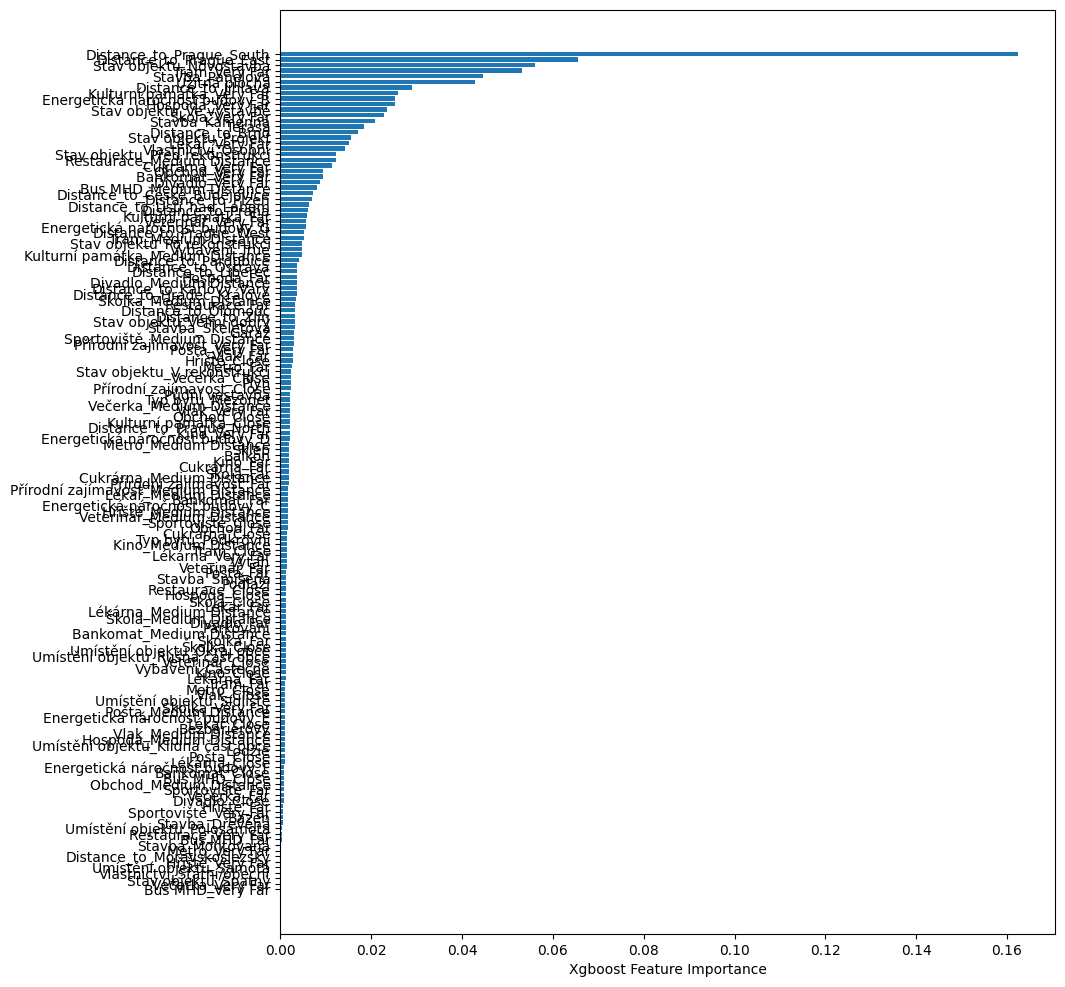

In [88]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
feature_importances = best_model.feature_importances_

# Sort features based on importance
sorted_idx = feature_importances.argsort()

# Plot feature importances
plt.figure(figsize=(10, 12))
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Xgboost Feature Importance")
plt.show()


In [73]:
num_features = 10
selected_features = X.columns[sorted_idx][-num_features:]
X_selected = X[selected_features]


In [74]:
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [75]:
best_model.fit(X_train_selected, y_train)


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [76]:
y_pred = best_model.predict(X_test_selected)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)


1174834.6789392994


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

In [89]:
from sklearn.feature_selection import RFE


In [96]:
selector = RFE(best_model, n_features_to_select=110, step=1)


In [97]:
selector = selector.fit(X_train, y_train)


In [98]:
selected_features = X.columns[selector.support_]


In [99]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

best_model.fit(X_train_selected, y_train)

y_pred = best_model.predict(X_test_selected)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

936372.4284617902


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

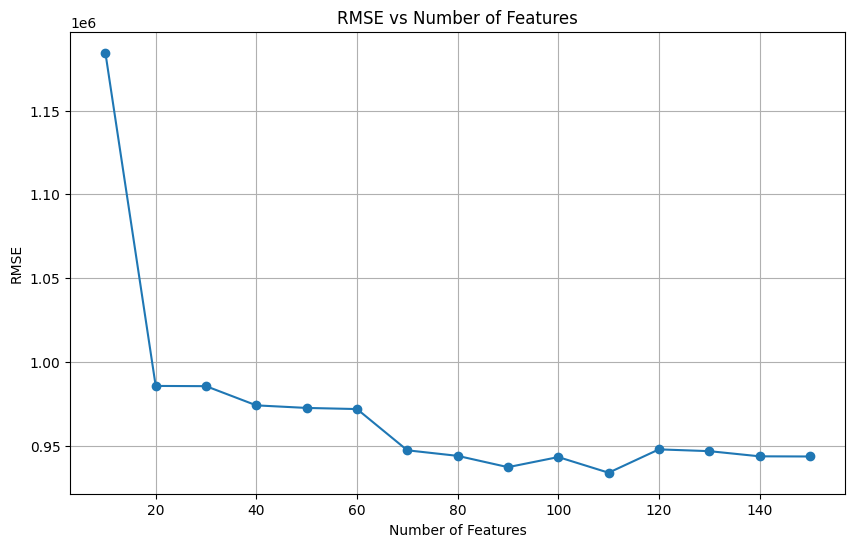

In [95]:
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import numpy as np

# Initialize the model
model = xgb.XGBRegressor(objective ='reg:squarederror', 
                          learning_rate=0.3,
                          max_depth=6,
                          min_child_weight=5,
                          seed=42)

# Lists to store results
num_features_list = list(range(10, 151, 10))  # Starting from 10, increasing by 10 up to 150
rmse_list = []

# RFE for different number of features
for num_features in num_features_list:
    selector = RFE(model, n_features_to_select=num_features, step=10)
    selector = selector.fit(X_train, y_train)
    selected_features = X.columns[selector.support_]
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_list.append(rmse)

# Plot RMSE vs number of features
plt.figure(figsize=(10, 6))
plt.plot(num_features_list, rmse_list, marker='o')
plt.xlabel("Number of Features")
plt.ylabel("RMSE")
plt.title("RMSE vs Number of Features")
plt.grid(True)
plt.show()

/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

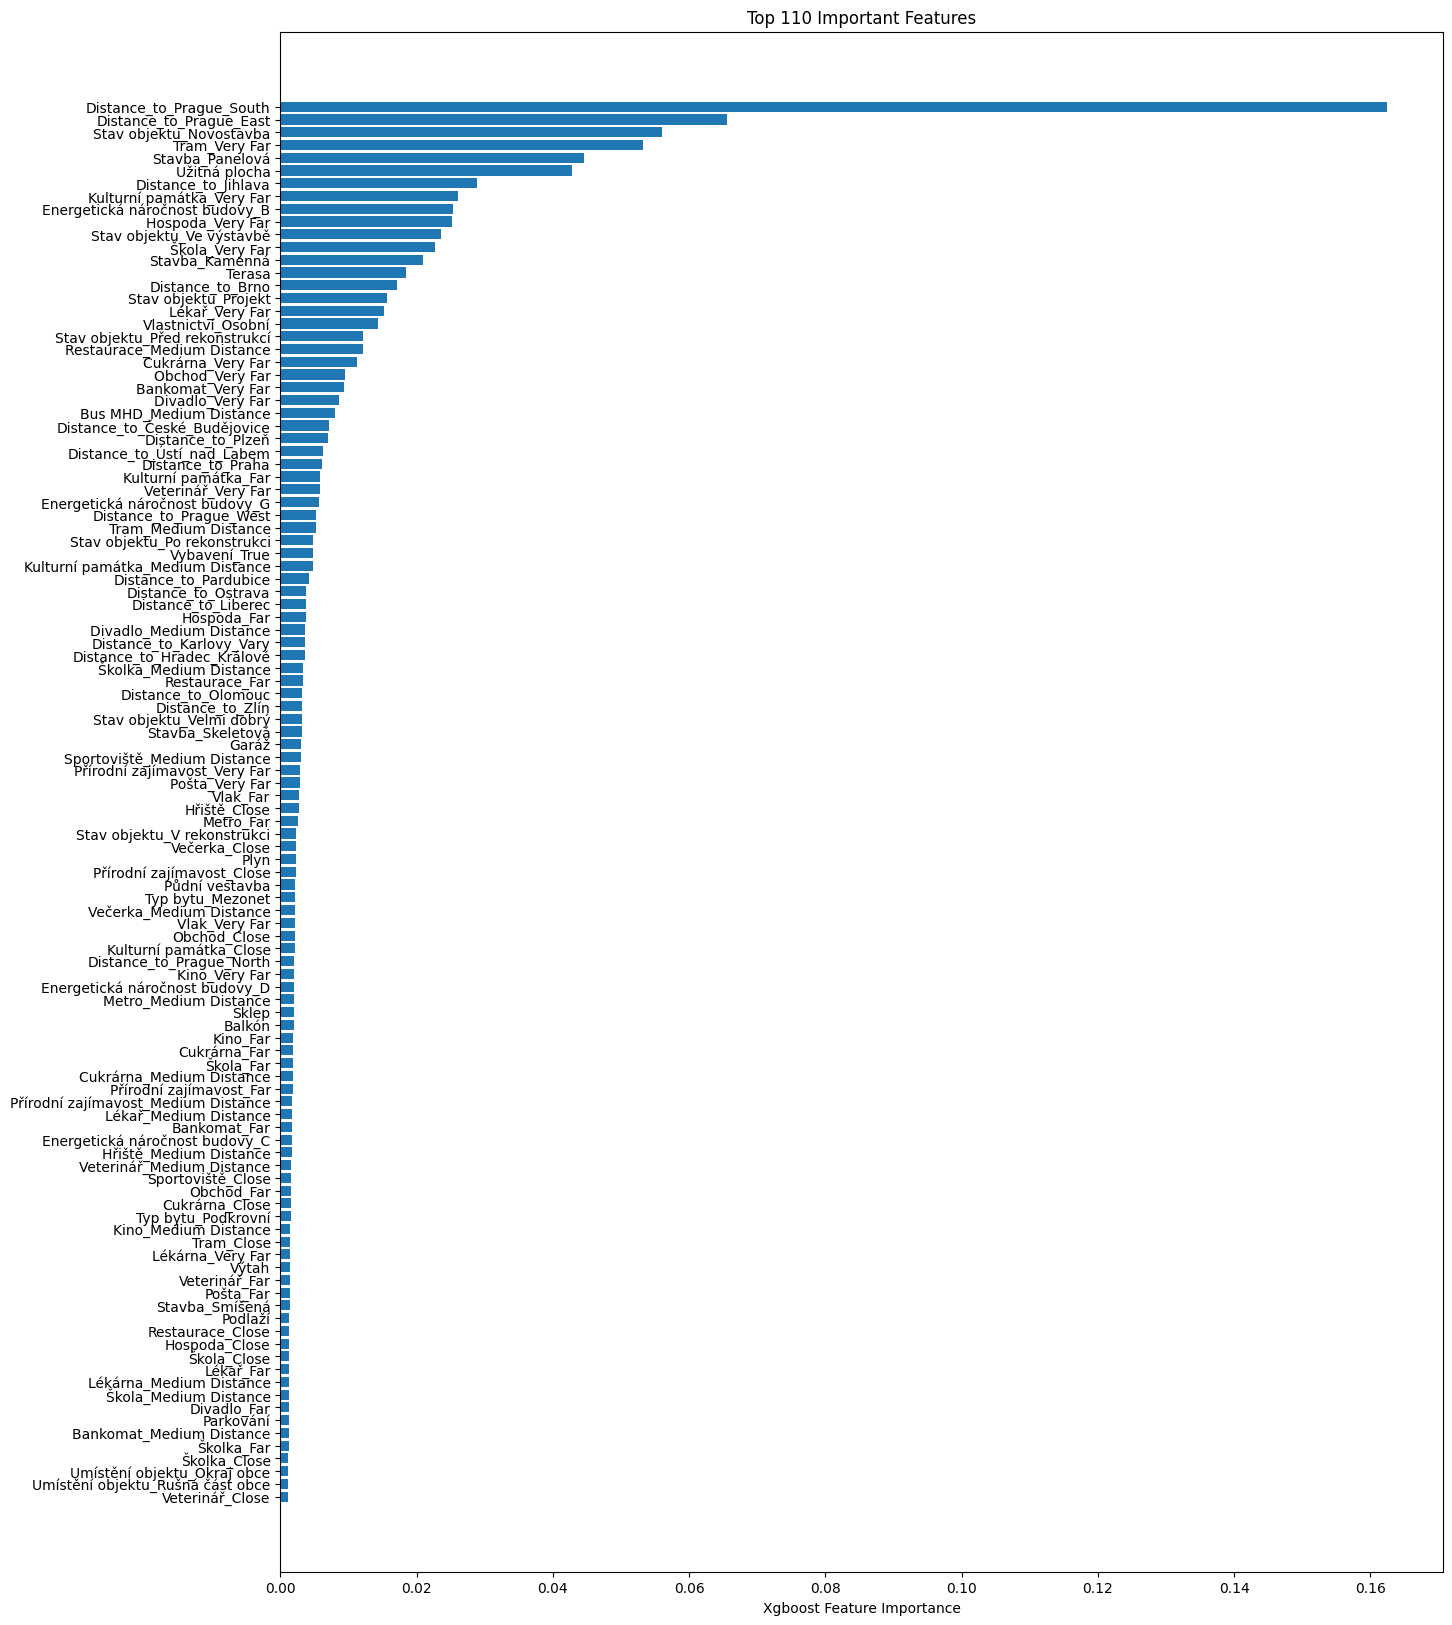

Index(['Veterinář_Close', 'Umístění objektu_Rušná část obce',
       'Umístění objektu_Okraj obce', 'Školka_Close', 'Školka_Far',
       'Bankomat_Medium Distance', 'Parkování', 'Divadlo_Far',
       'Škola_Medium Distance', 'Lékárna_Medium Distance',
       ...
       'Hospoda_Very Far', 'Energetická náročnost budovy_B',
       'Kulturní památka_Very Far', 'Distance_to_Jihlava', 'Užitná plocha',
       'Stavba_Panelová', 'Tram_Very Far', 'Stav objektu_Novostavba',
       'Distance_to_Prague_East', 'Distance_to_Prague_South'],
      dtype='object', length=110)

In [100]:
# Train the model using all features
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Sort features based on importance
sorted_idx = feature_importances.argsort()

# Plot feature importances for better visualization
plt.figure(figsize=(15, 20))
plt.barh(X.columns[sorted_idx][-110:], feature_importances[sorted_idx][-110:])  # Displaying top 110 features
plt.xlabel("Xgboost Feature Importance")
plt.title("Top 110 Important Features")
plt.show()

# Get the top 110 features based on importance
top_features = X.columns[sorted_idx][-110:]
top_features


In [101]:
model.fit(X_train, y_train)
feature_importances = model.feature_importances_
sorted_idx = feature_importances.argsort()


/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/patrik/Library/Python/3.9/lib/python/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is

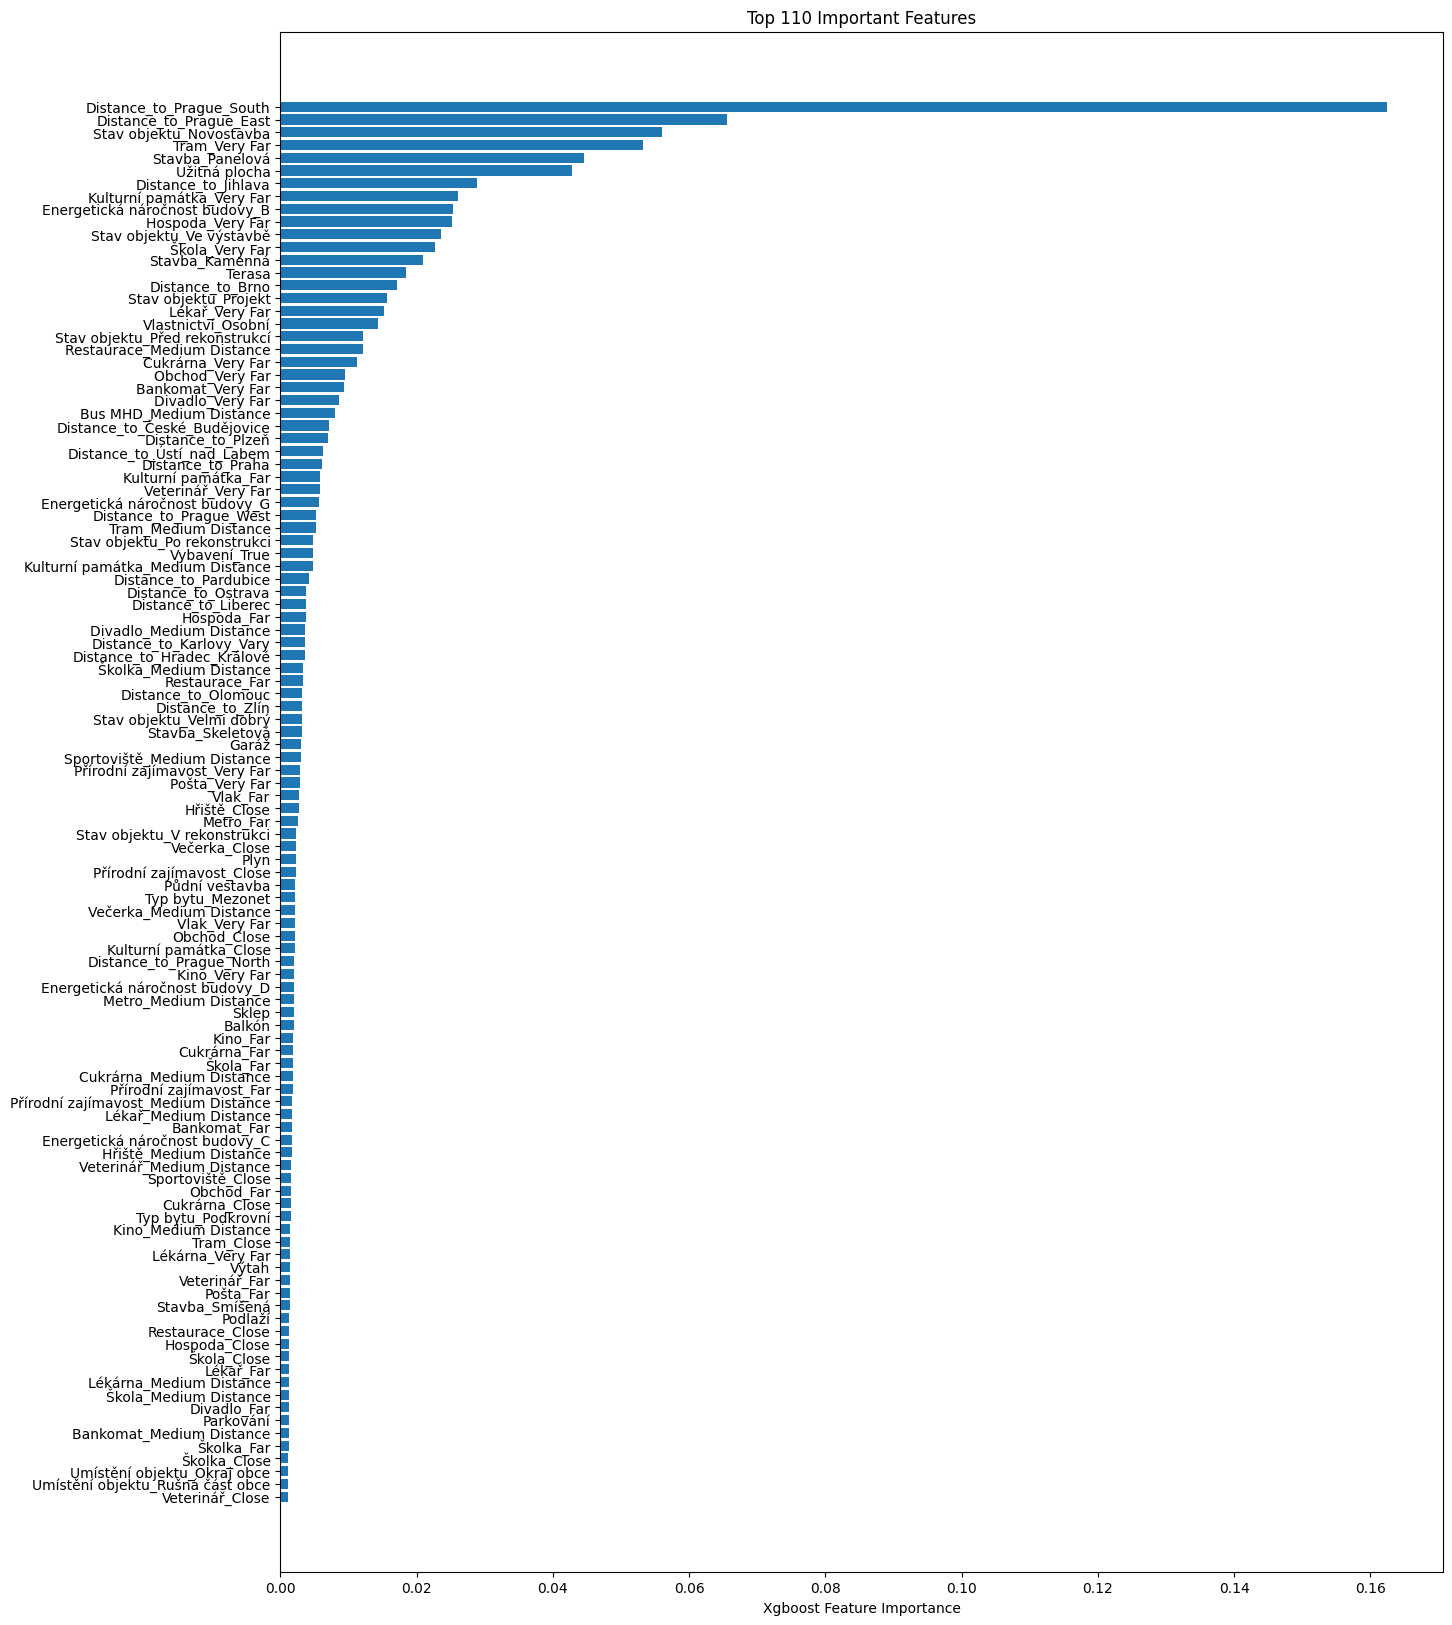

In [102]:
plt.figure(figsize=(15, 20))
plt.barh(X.columns[sorted_idx][-110:], feature_importances[sorted_idx][-110:])
plt.xlabel("Xgboost Feature Importance")
plt.title("Top 110 Important Features")
plt.show()


In [103]:
top_features = X.columns[sorted_idx][-110:]
